In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Clinical Demographic Group

In [48]:
from pathlib import Path
import pandas as pd
import yaml

# Define the base path relative to the repo structure

repo_root = Path.home() / "OneDrive" / "Documentos" / "ProjectMentalHealth" # or manually set if needed

# Load YAML config file
with open(repo_root / "Mental_Health_State_Prediction" / "Notebooks"/ "config.yaml", "r") as f:
    config = yaml.safe_load(f)

# Get filenames from config
clinical_filename = config["clinical_file"]
target_filename = config["target_file"]

# Define common data folder path
data_path = repo_root / "Mental_Health_State_Prediction" / "Data" / "Clean_Data"

# Build full paths
clinical_dataset_path = data_path / clinical_filename
target_path = data_path / target_filename

# Load CSV files
Clinical = pd.read_csv(clinical_dataset_path, sep=",", index_col=False)
target = pd.read_csv(target_path, index_col=False)
# Drop unnecessary column
if "Unnamed: 0" in target.columns:
    target.drop(columns="Unnamed: 0", inplace=True)

# Show data
display(Clinical.head())
target.head()

,Mental Illness,Intellectual Disability,Autism Spectrum,Other Developmental Disability,Alcohol Related Disorder,Drug Substance Disorder,Opioid Related Disorder,Serious Mental Illness,Principal Diagnosis Class,Additional Diagnosis Class,...,No Chronic Med Condition,Unknown Chronic Med Condition,Cannabis Recreational Use,Cannabis Medicinal Use,Smokes,Received Smoking Medication,Received Smoking Counseling,Alcohol 12m Service,Opioid 12m Service,Drug/Substance 12m Service
0,YES,NO,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,UNKNOWN,...,YES,False,NO,NO,NO,NO,NO,NO,NO,NO
1,YES,NO,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,MENTAL ILLNESS,...,YES,False,NO,NO,NO,NO,NO,NO,NO,NO
2,YES,NO,NO,YES,NO,YES,NO,YES,MENTAL ILLNESS,SUBSTANCE-RELATED AND ADDICTIVE DISORDERS,...,YES,False,YES,NO,YES,NO,NO,NO,NO,NO
3,YES,NO,NO,NO,YES,YES,NO,YES,MENTAL ILLNESS,SUBSTANCE-RELATED AND ADDICTIVE DISORDERS,...,YES,False,NO,NO,YES,NO,YES,YES,NO,NO
4,YES,NO,NO,NO,YES,NO,NO,YES,MENTAL ILLNESS,MENTAL ILLNESS,...,NO,False,NO,NO,YES,NO,YES,NO,NO,NO


,Mental Illness
0,YES
1,YES
2,YES
3,YES
4,YES


In [3]:
# frequency_table  function
def frequency_table(data: pd.DataFrame, target_col: str, feature_cols):
    freq_tab = pd.crosstab(index = data[target_col], columns = data[feature_cols], margins = True)
    rel_table = round(freq_tab/freq_tab.loc["All"], 2)
    return freq_tab, rel_table

In [4]:
#Clinical
# new  group dataset (I add the target)
new_clin_grp = Clinical.copy()
new_clin_grp["Mental Illness"] = target["Mental Illness"].values
new_clin_grp.head()

,Mental Illness,Intellectual Disability,Autism Spectrum,Other Developmental Disability,Alcohol Related Disorder,Drug Substance Disorder,Opioid Related Disorder,Serious Mental Illness,Principal Diagnosis Class,Additional Diagnosis Class,...,No Chronic Med Condition,Unknown Chronic Med Condition,Cannabis Recreational Use,Cannabis Medicinal Use,Smokes,Received Smoking Medication,Received Smoking Counseling,Alcohol 12m Service,Opioid 12m Service,Drug/Substance 12m Service
0,YES,NO,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,UNKNOWN,...,YES,False,NO,NO,NO,NO,NO,NO,NO,NO
1,YES,NO,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,MENTAL ILLNESS,...,YES,False,NO,NO,NO,NO,NO,NO,NO,NO
2,YES,NO,NO,YES,NO,YES,NO,YES,MENTAL ILLNESS,SUBSTANCE-RELATED AND ADDICTIVE DISORDERS,...,YES,False,YES,NO,YES,NO,NO,NO,NO,NO
3,YES,NO,NO,NO,YES,YES,NO,YES,MENTAL ILLNESS,SUBSTANCE-RELATED AND ADDICTIVE DISORDERS,...,YES,False,NO,NO,YES,NO,YES,YES,NO,NO
4,YES,NO,NO,NO,YES,NO,NO,YES,MENTAL ILLNESS,MENTAL ILLNESS,...,NO,False,NO,NO,YES,NO,YES,NO,NO,NO


### Categories smart aggregation

In [5]:
def aggregate_Principal_Diagnosis_Class(df):
    "This function aggregates the initial 6 categories into 4"
    return df['Principal Diagnosis Class'].replace({
                                            'MENTAL ILLNESS': 'MENTAL ILLNESS',
                                            'NOT MI - DEVELOPMENTAL DISORDERS': 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER',
                                            'NOT MI - ORGANIC MENTAL DISORDER': 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER',
                                            'NOT MI - OTHER': 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER',
                                            'SUBSTANCE-RELATED AND ADDICTIVE DISORDERS': 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER',
                                            'UNKNOWN': 'UNKNOWN'
                                        })



def aggregate_additional_Diagnosis_Class(df):
    "This function aggregates the initial 7 categories into 5"
    return df['Additional Diagnosis Class'].replace({
                                            'MENTAL ILLNESS': 'MENTAL ILLNESS',
                                            'NO ADDITIONAL DIAGNOSIS': 'NO ADDITIONAL DIAGNOSIS',
                                            'NOT MI - DEVELOPMENTAL DISORDERS': 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER',
                                            'NOT MI - ORGANIC MENTAL DISORDER': 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER',
                                            'NOT MI - OTHER': 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER',
                                            'SUBSTANCE-RELATED AND ADDICTIVE DISORDERS': 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER',
                                            'UNKNOWN': 'UNKNOWN'
                                        })



In [6]:
# Use all the aggregation funxtions into one
def apply_all_aggregations(df):
    df = df.copy()
    df['Principal Diagnosis Class'] = aggregate_Principal_Diagnosis_Class(df)
    df['Additional Diagnosis Class'] = aggregate_additional_Diagnosis_Class(df)
    return df

In [7]:
# Apply to clinical dataset
Clinical_cat_agg = apply_all_aggregations(new_clin_grp)

# check unique values after aggregation
for col in Clinical_cat_agg.columns:
    print(f"{col} → {Clinical_cat_agg[col].unique()}")


Mental Illness → ['YES' 'NO']
Intellectual Disability → ['NO' 'YES' 'UNKNOWN']
Autism Spectrum → ['NO' 'UNKNOWN' 'YES']
Other Developmental Disability → ['NO' 'YES' 'UNKNOWN']
Alcohol Related Disorder → ['NO' 'YES' 'UNKNOWN']
Drug Substance Disorder → ['NO' 'YES' 'UNKNOWN']
Opioid Related Disorder → ['NO' 'YES' 'UNKNOWN']
Serious Mental Illness → ['YES' 'NO' 'UNKNOWN']
Principal Diagnosis Class → ['MENTAL ILLNESS' 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER'
 'UNKNOWN']
Additional Diagnosis Class → ['UNKNOWN' 'MENTAL ILLNESS'
 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER'
 'NO ADDITIONAL DIAGNOSIS']
Mobility Impairment Disorder → ['NO' 'YES' 'UNKNOWN']
Hearing Impairment → ['NO' 'YES' 'UNKNOWN']
Visual Impairment → ['NO' 'YES' 'UNKNOWN']
Speech Impairment → ['NO' 'YES' 'UNKNOWN']
Hyperlipidemia → ['NO' 'YES' 'UNKNOWN']
High Blood Pressure → ['NO' 'YES' 'UNKNOWN']
Diabetes → ['NO' 'YES' 'UNKNOWN']
Obesity → ['NO' 'YES' 'UNKNOWN']
Heart Attack → ['NO' 'UNKNOWN' 'YE

In [8]:
#Let's check again the imbalace between "Yes" an "No" in the target column "Mental Illness"

for col in Clinical_cat_agg.columns[1:-2]:
    freq, rel = frequency_table(Clinical_cat_agg, "Mental Illness", col)
    print("Two-way frequency table")
    print(freq)
    #print("Two-way relative frequency table")
    #print(rel)
    print("------" * 15)
    print()
    print()

Two-way frequency table
Intellectual Disability      NO  UNKNOWN    YES     All
Mental Illness                                         
NO                         5174      121    282    5577
YES                      158079    15727  14734  188540
All                      163253    15848  15016  194117
------------------------------------------------------------------------------------------


Two-way frequency table
Autism Spectrum      NO  UNKNOWN   YES     All
Mental Illness                                
NO                 5313      100   164    5577
YES              168994    14429  5117  188540
All              174307    14529  5281  194117
------------------------------------------------------------------------------------------


Two-way frequency table
Other Developmental Disability      NO  UNKNOWN   YES     All
Mental Illness                                               
NO                                5334      128   115    5577
YES                             167262   

### Visual comparasion clinical variables

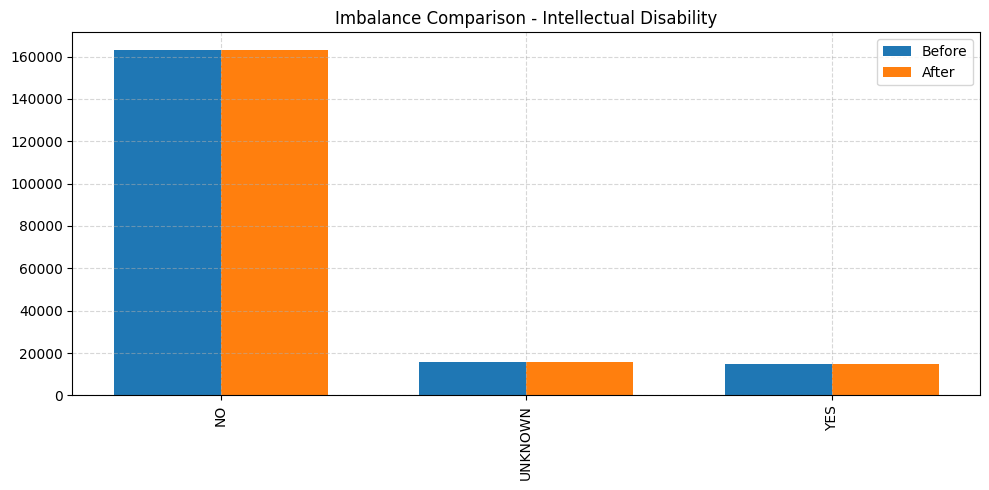

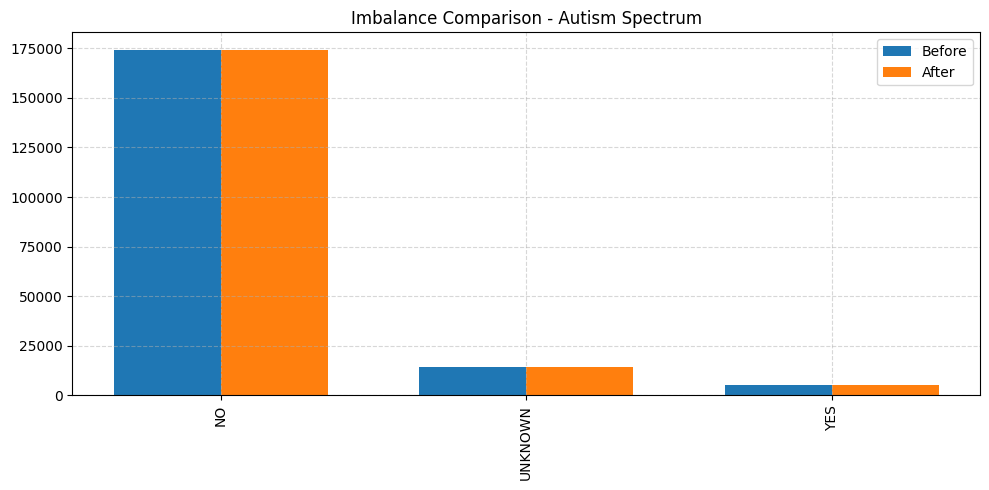

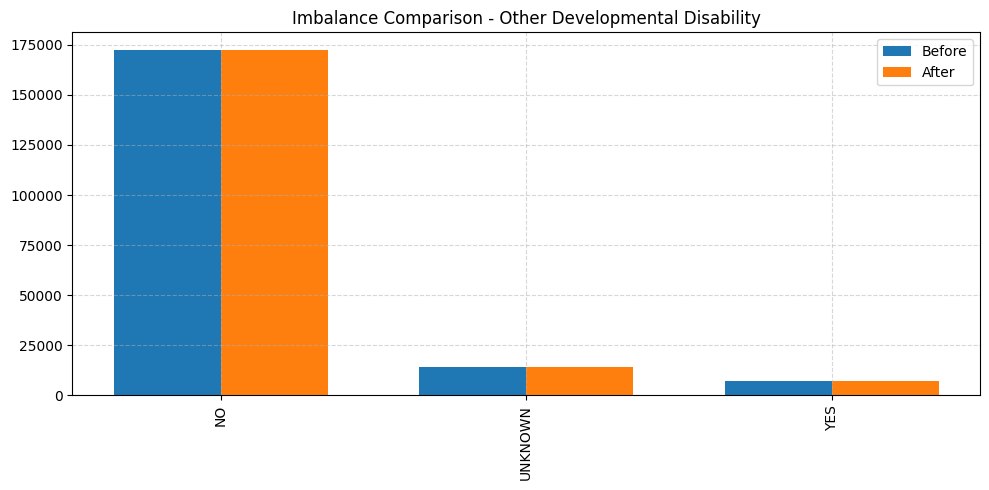

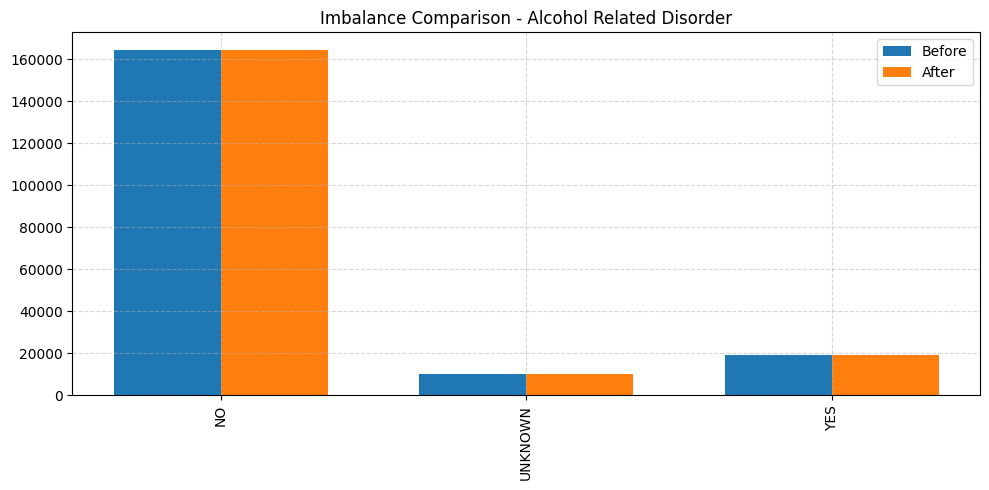

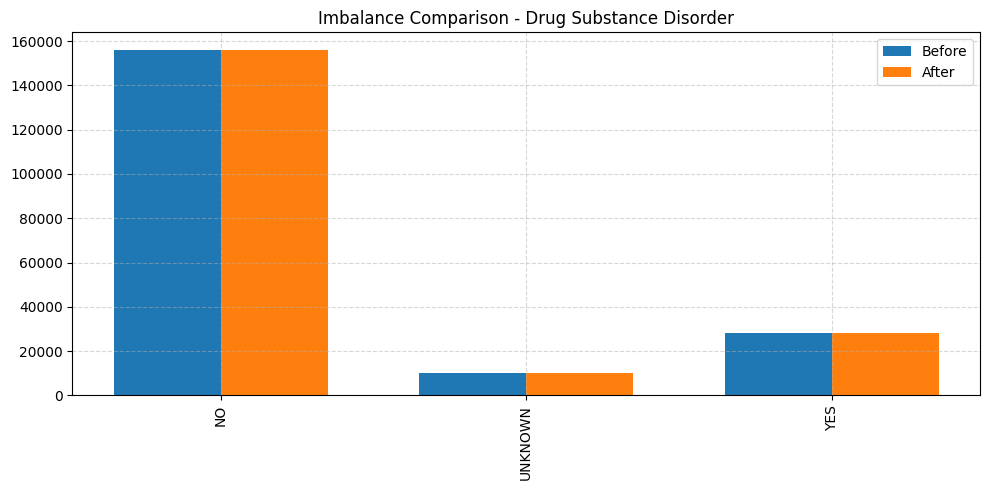

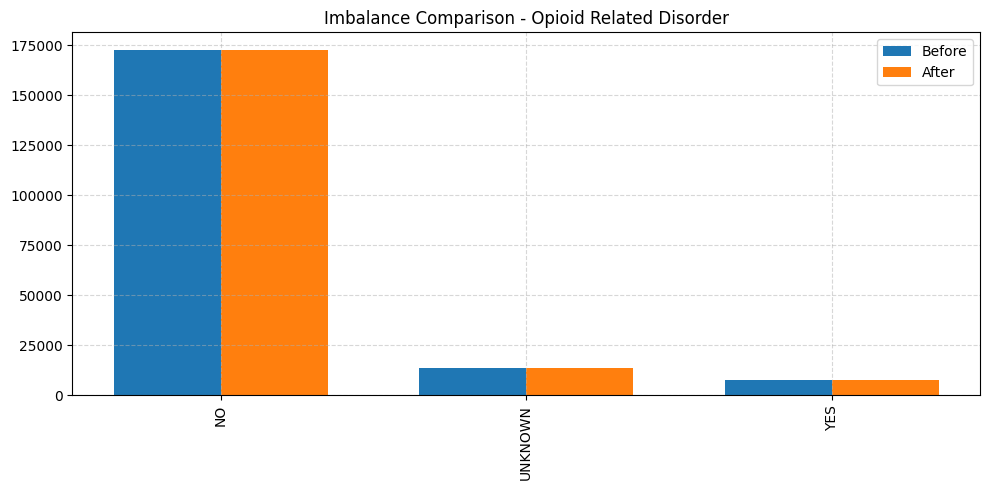

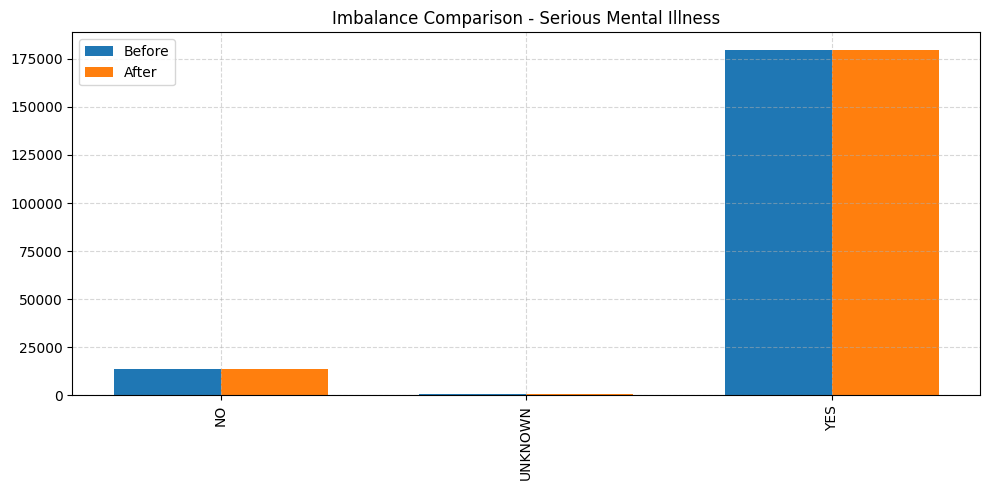

C:\Users\linad\AppData\Local\Temp\ipykernel_18404\1853201129.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


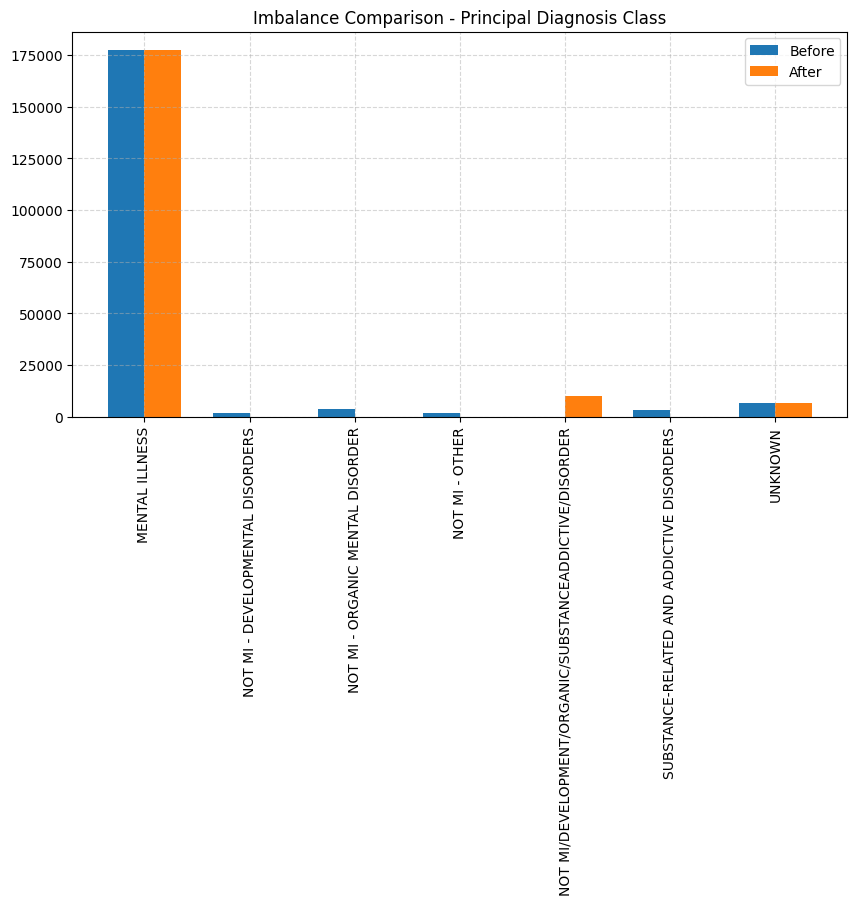

C:\Users\linad\AppData\Local\Temp\ipykernel_18404\1853201129.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


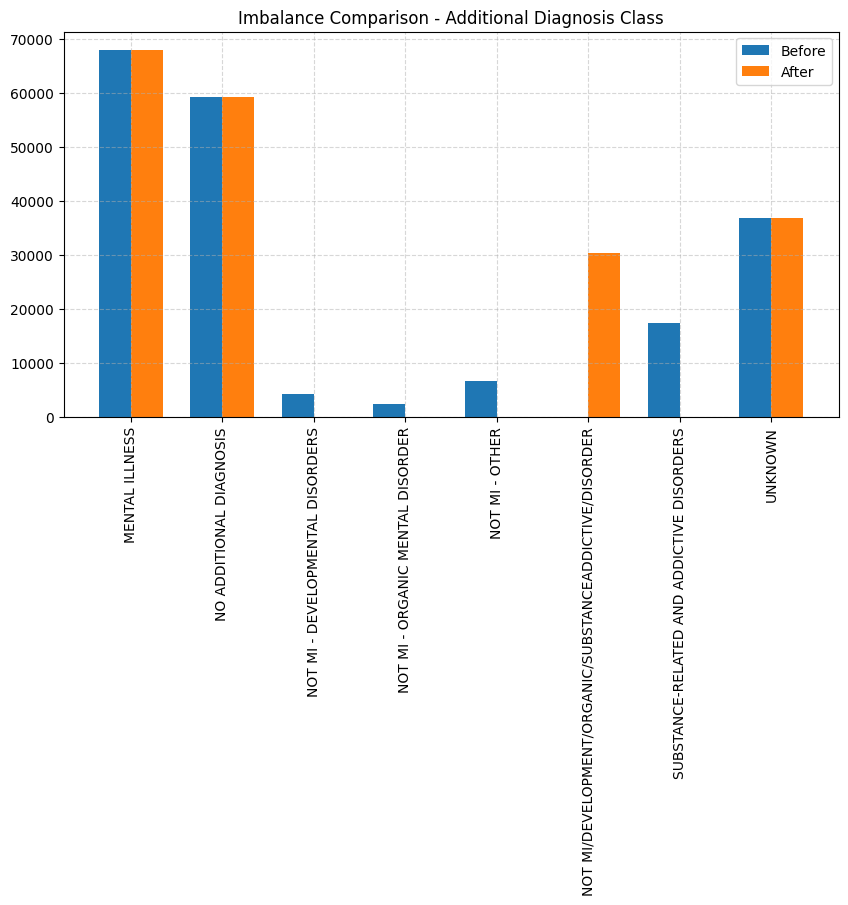

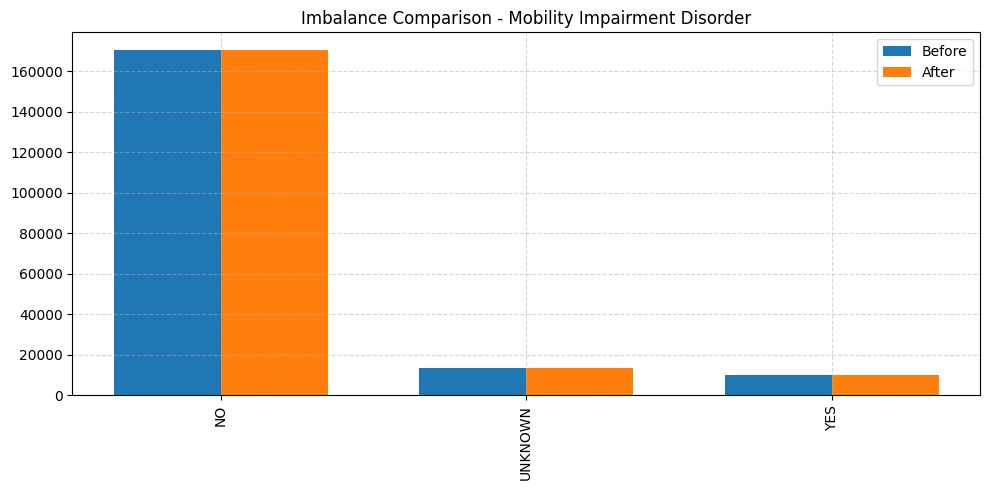

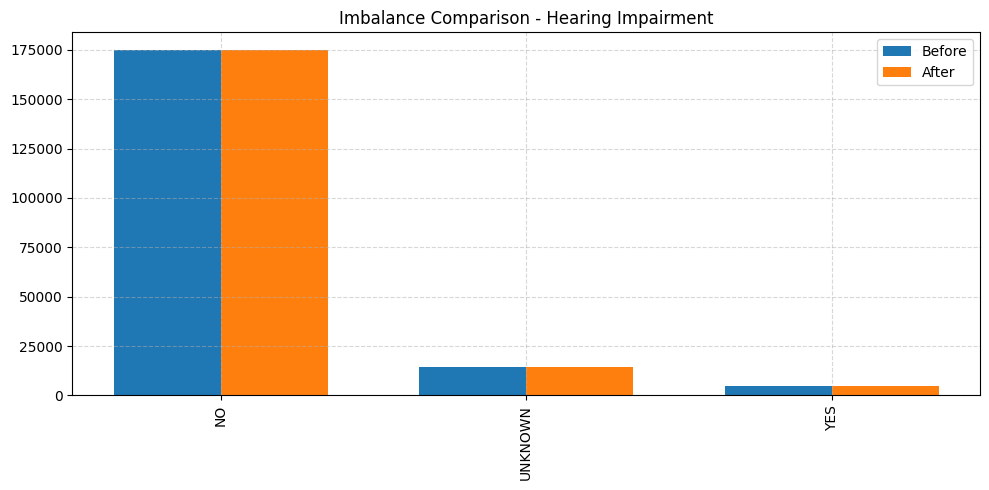

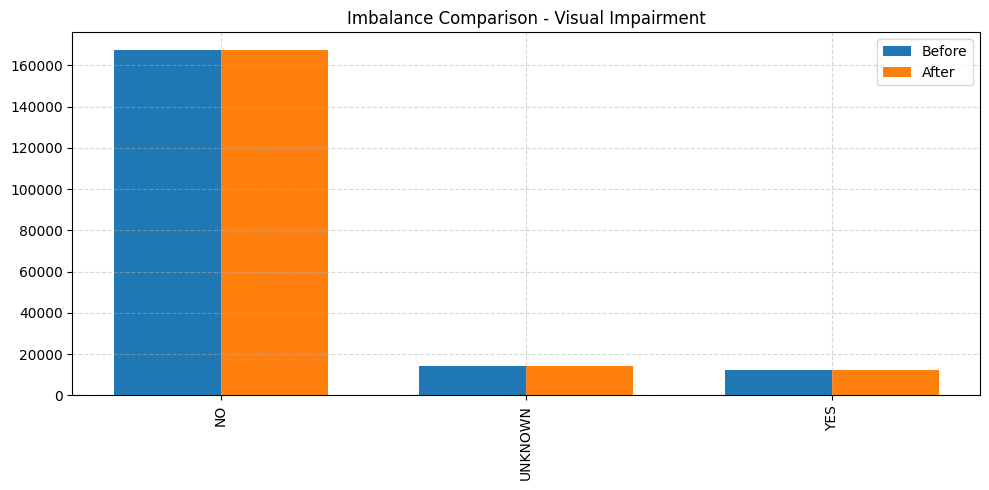

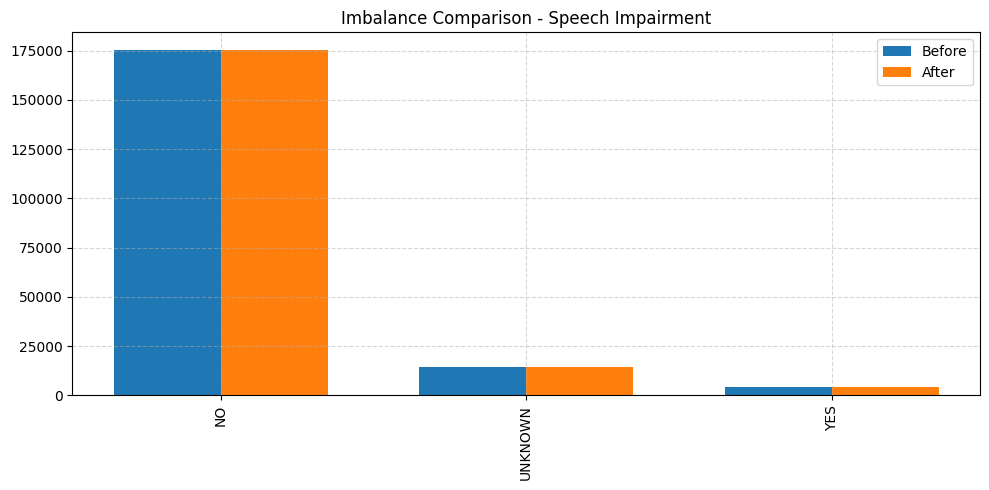

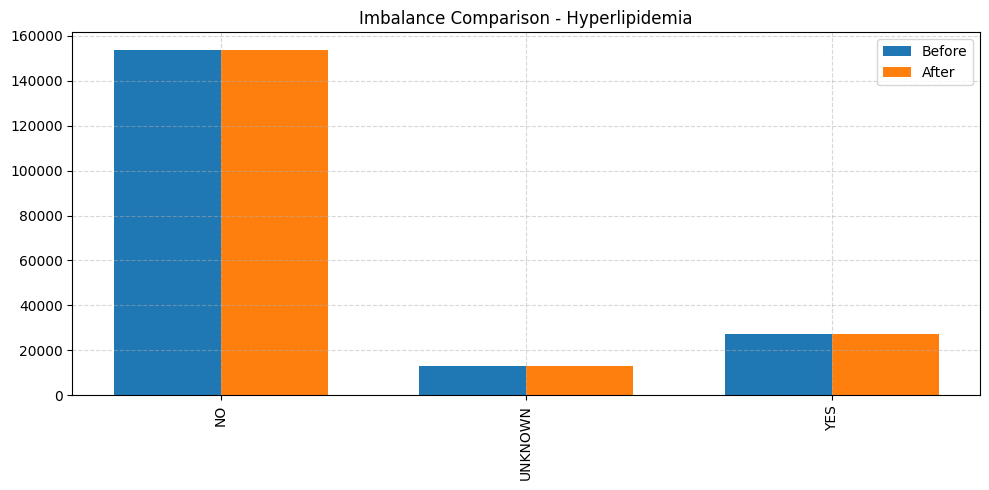

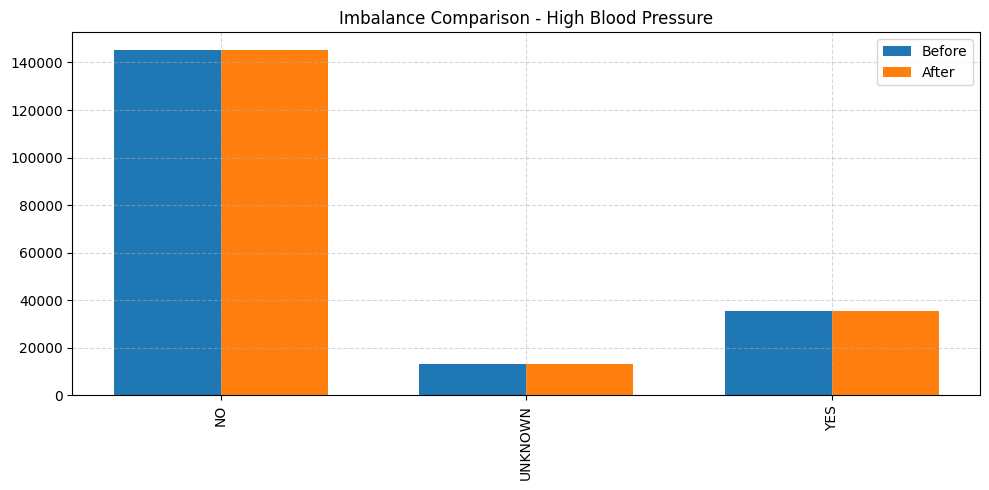

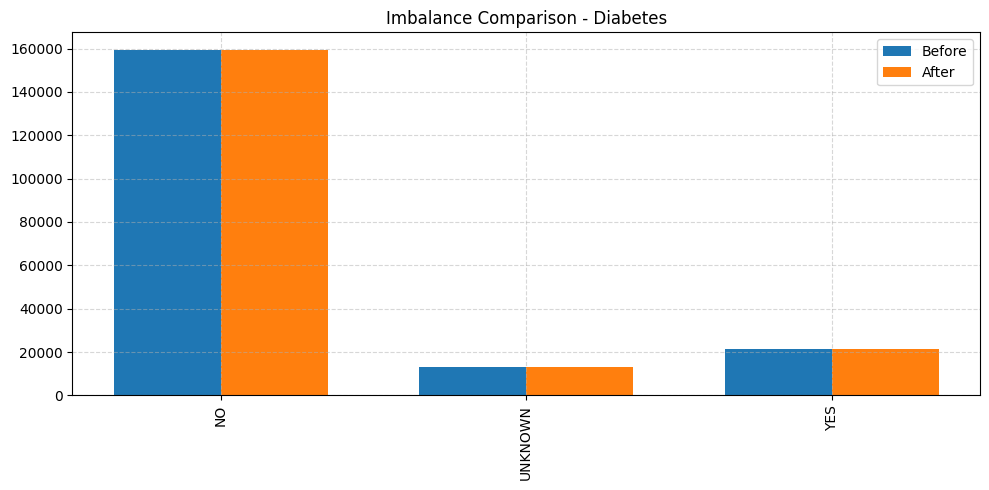

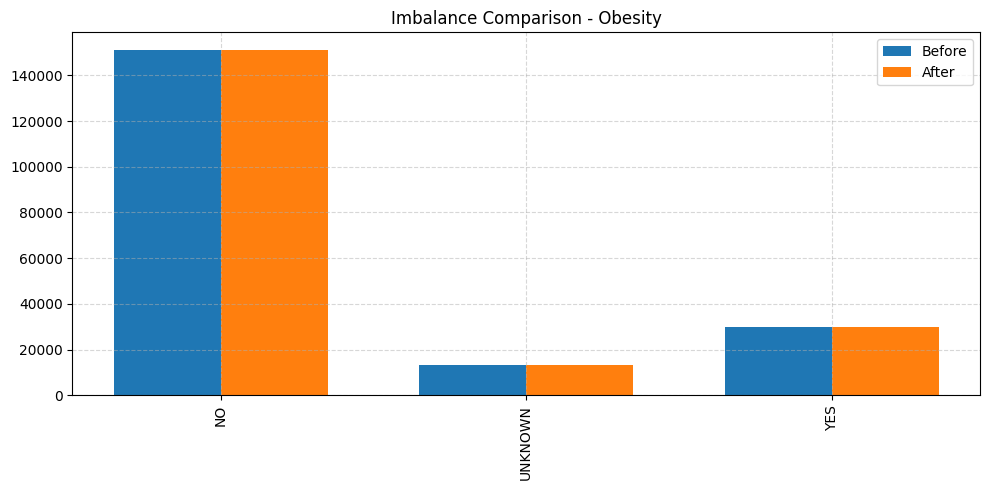

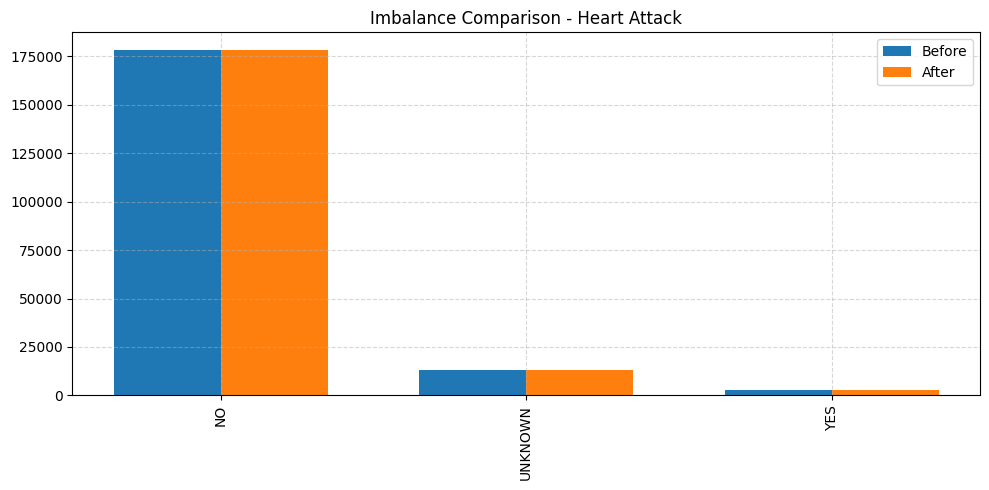

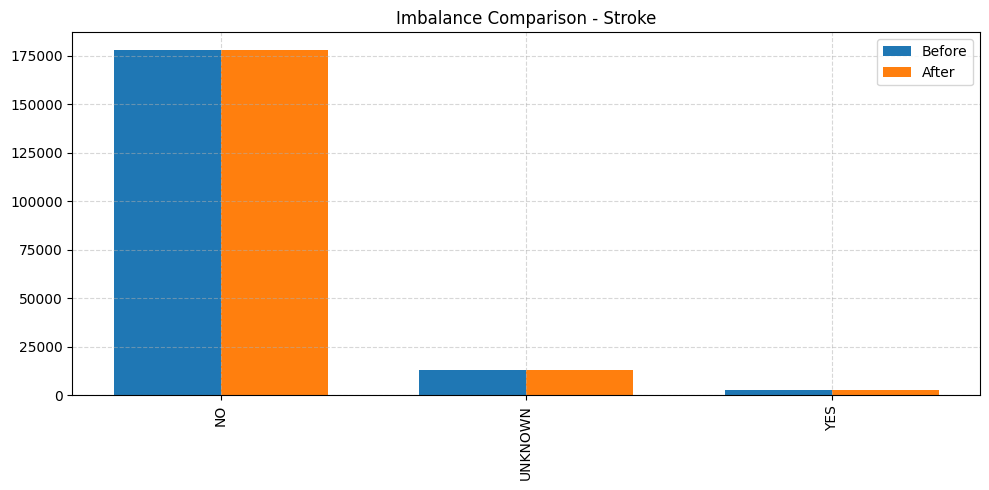

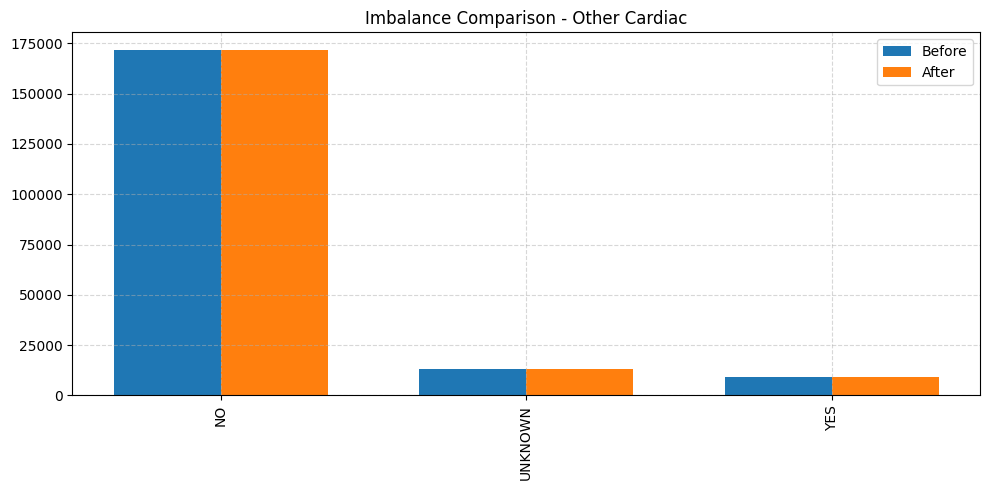

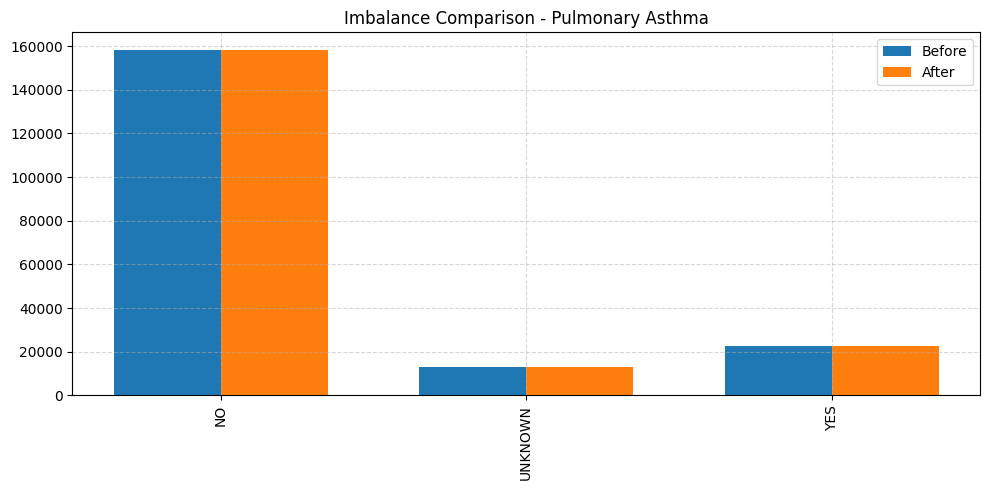

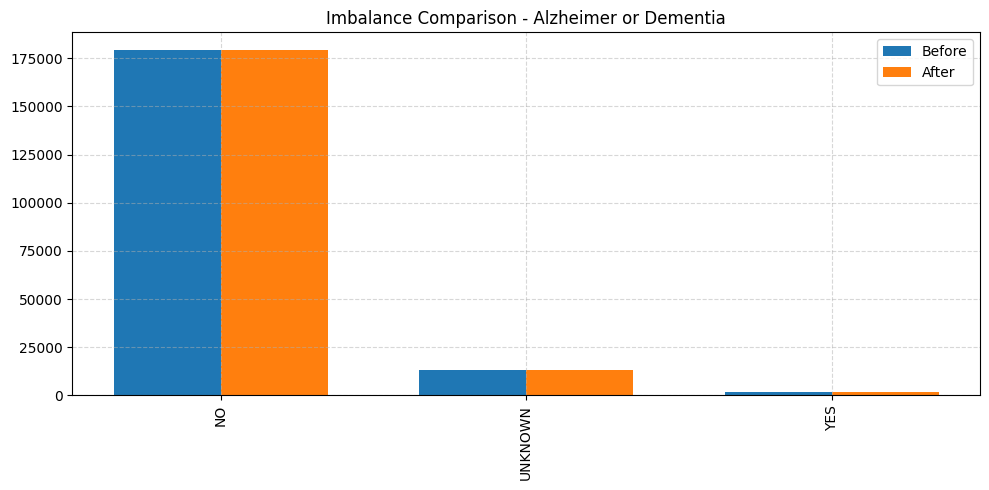

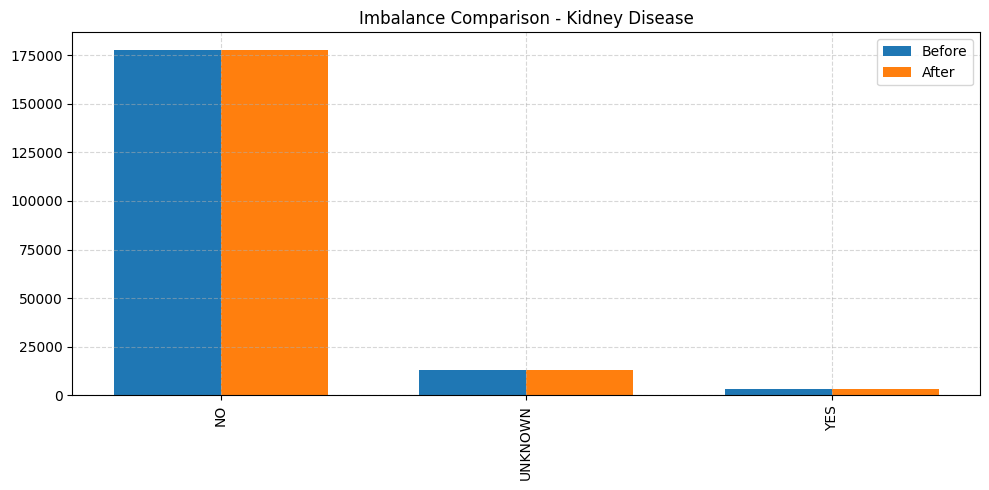

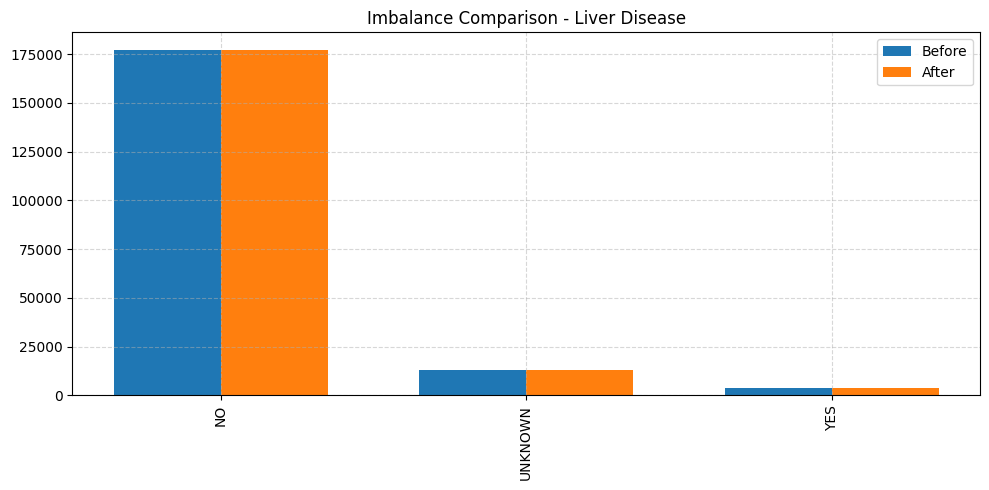

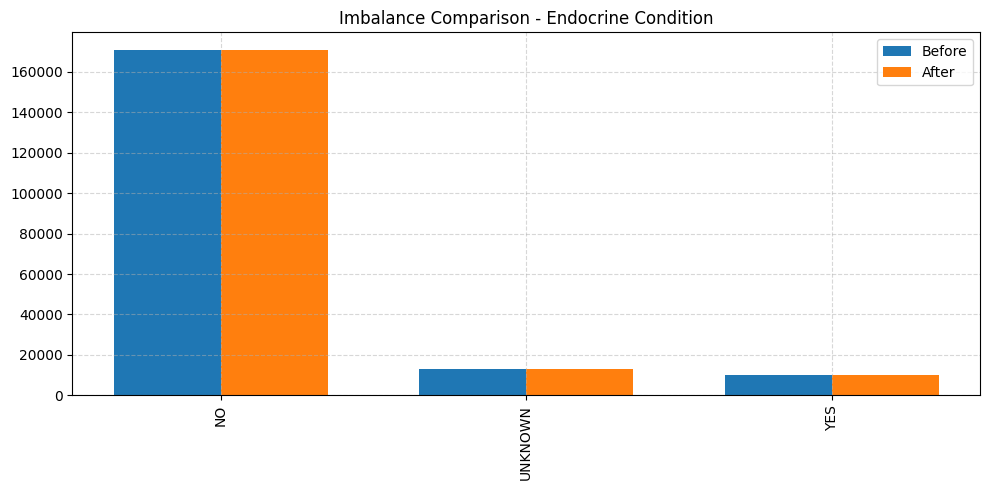

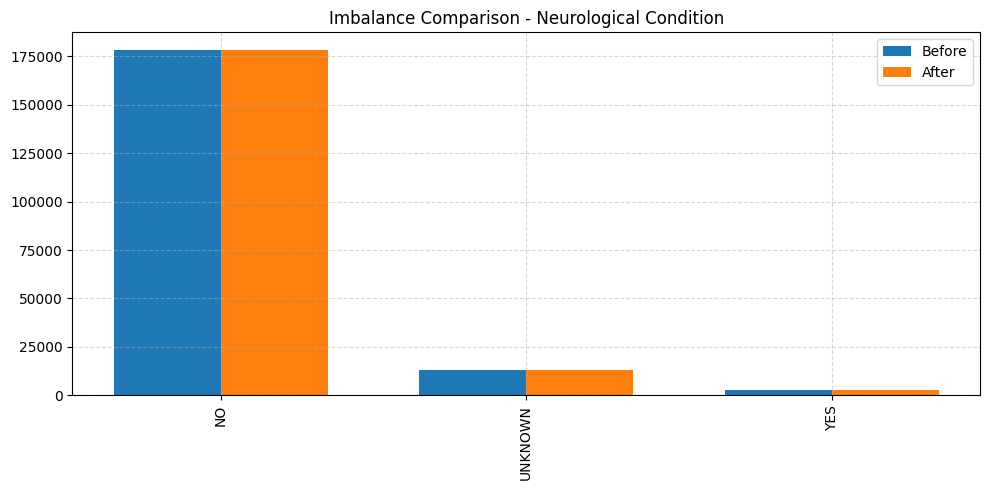

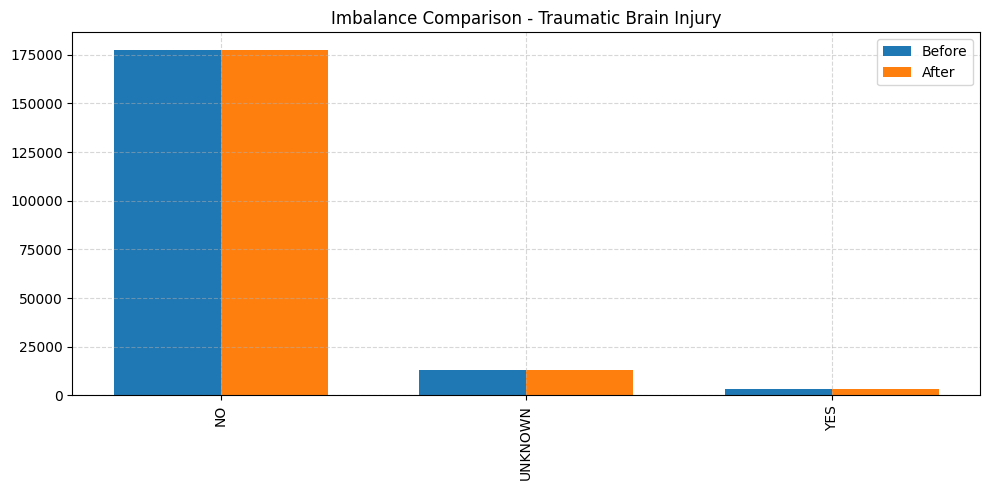

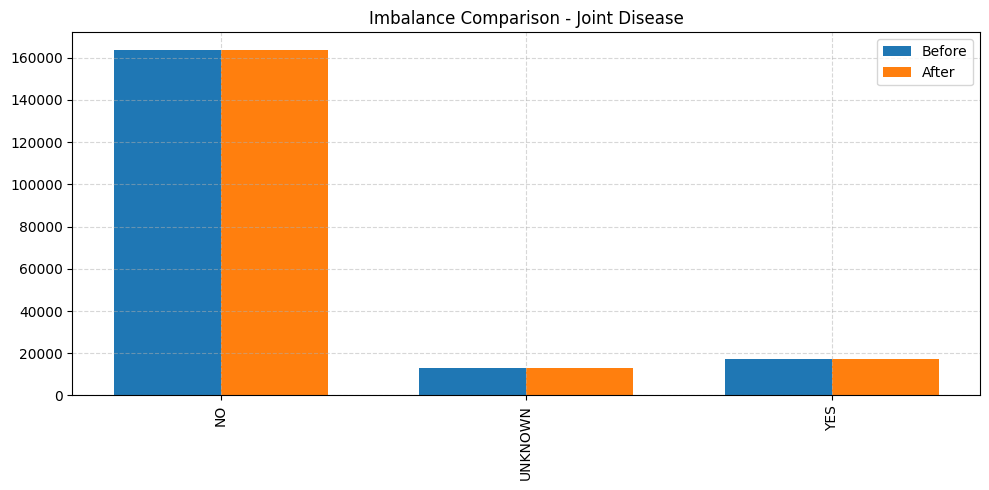

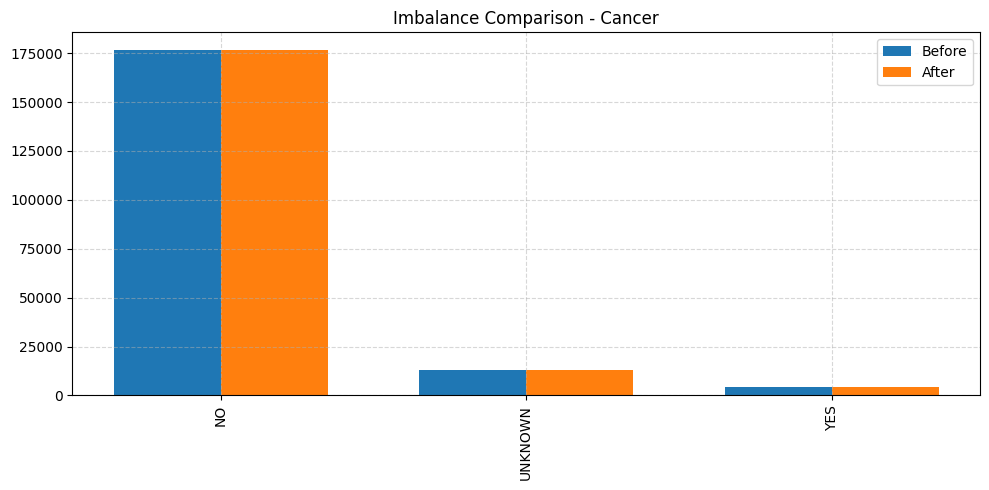

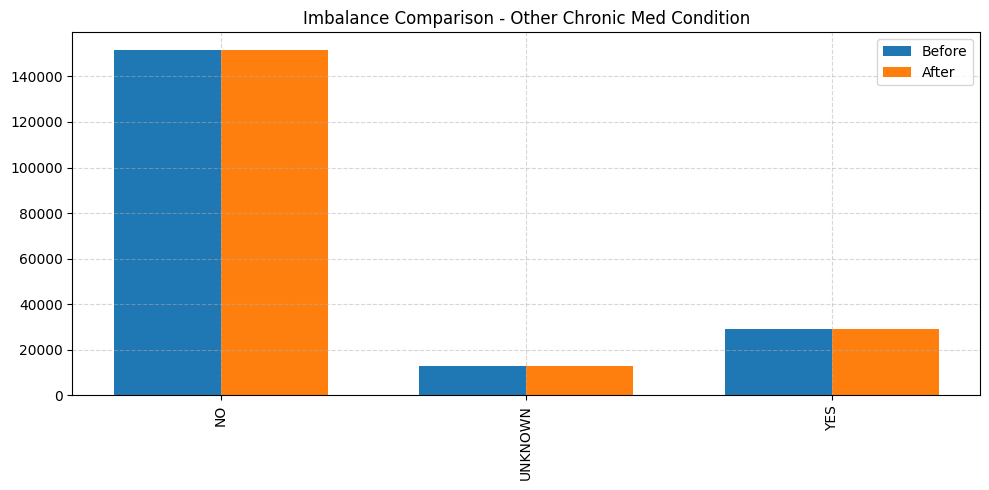

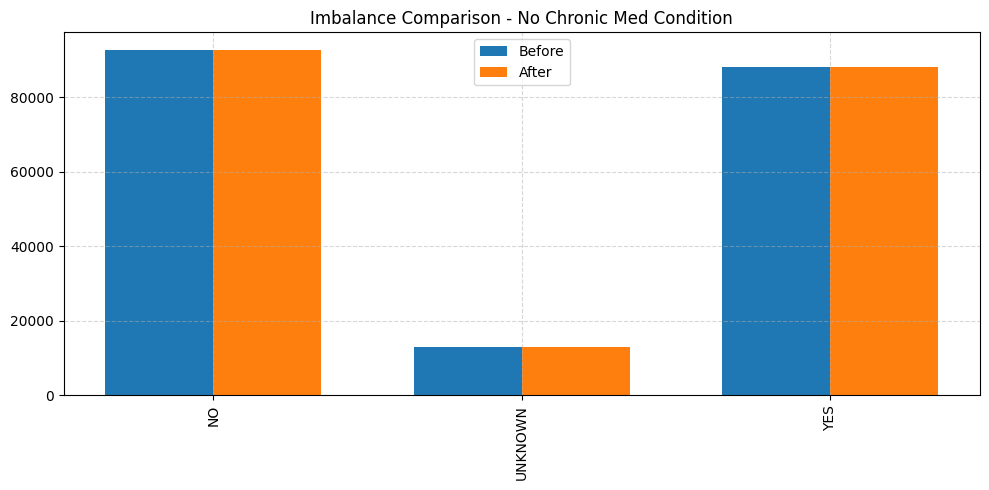

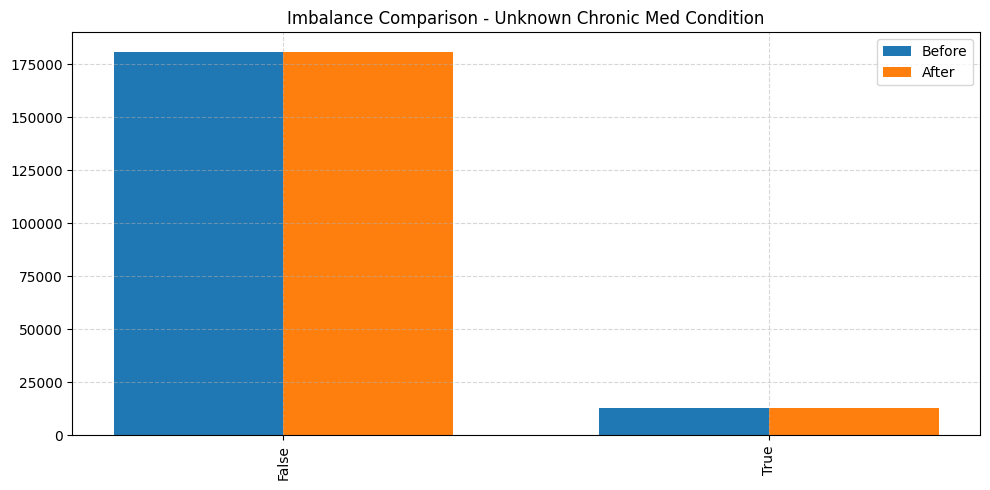

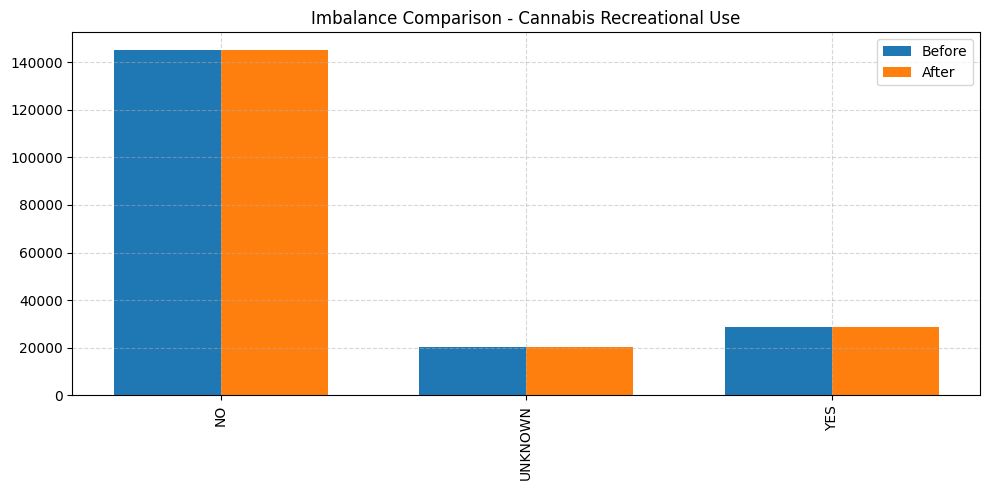

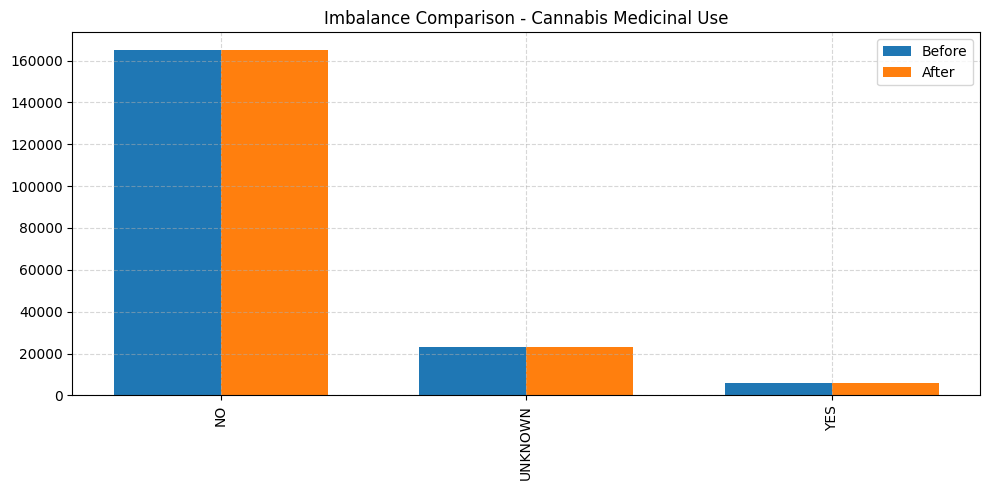

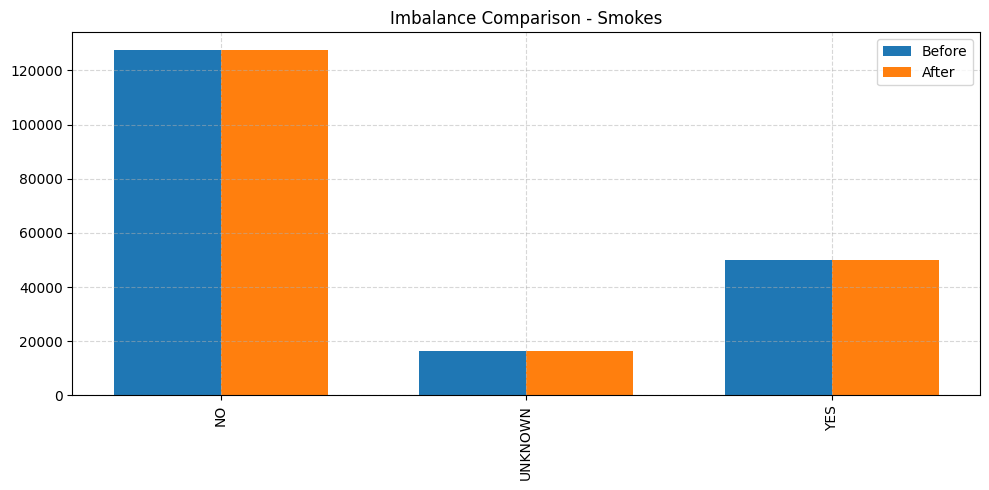

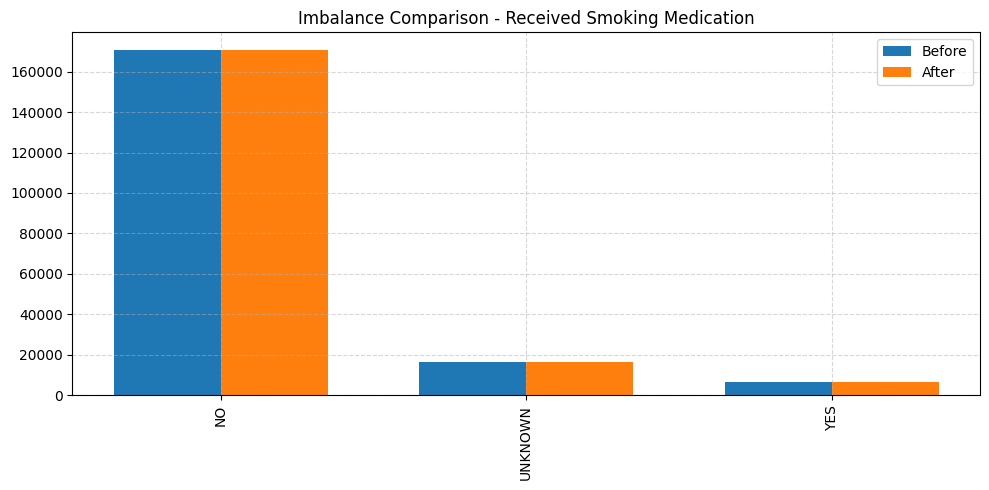

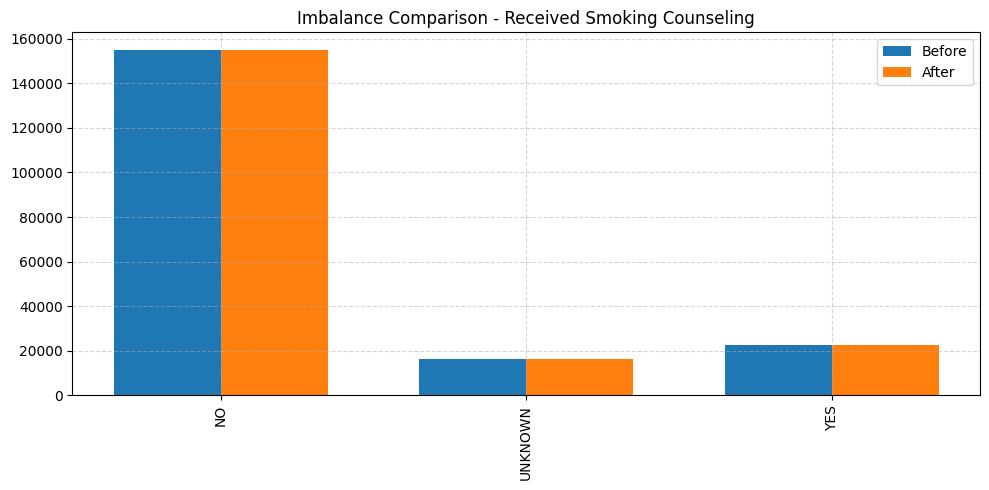

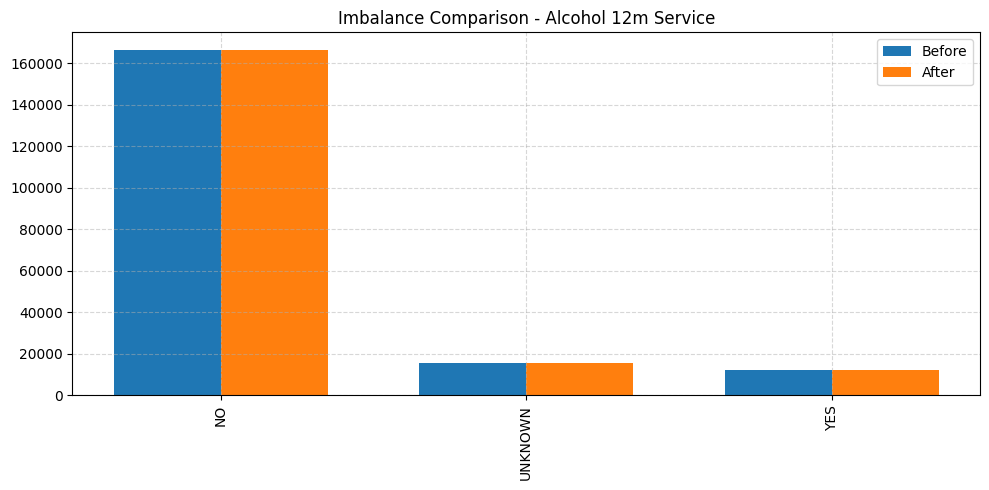

In [9]:
# Using Matplotlib

# Example list of columns you want to compare

columns_to_compare = new_clin_grp.columns[1:-2]

for col in columns_to_compare:
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Original counts
    original_counts = new_clin_grp[col].value_counts().sort_index()
    
    # Aggregated counts
    aggregated_counts = Clinical_cat_agg[col].value_counts().sort_index()
    
    # Align index (union of both sets of categories)
    all_categories = sorted(set(original_counts.index).union(set(aggregated_counts.index)))
    original_counts = original_counts.reindex(all_categories, fill_value=0)
    aggregated_counts = aggregated_counts.reindex(all_categories, fill_value=0)

    x = range(len(all_categories))
    width = 0.35

    ax.bar(x, original_counts, width=width, label='Before', align='center')
    ax.bar([i + width for i in x], aggregated_counts, width=width, label='After', align='center')

    ax.set_xticks([i + width / 2 for i in x])
    ax.set_xticklabels(all_categories, rotation=90, ha='center')
    ax.set_title(f'Imbalance Comparison - {col}')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

### Feature Engeneering clinical data

In [10]:
def diagnosis_class(row):
    principal = str(row['Principal Diagnosis Class']).strip().upper()
    additional = str(row['Additional Diagnosis Class']).strip().upper()

    mental_illness_labels = {
        'MENTAL ILLNESS'
    }

    not_mi_labels = {
        'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER'
    }

    no_additional_labels = {
        'NO ADDITIONAL DIAGNOSIS'
    }


    # Group MENTAL ILLNESS
    if (principal in mental_illness_labels and additional in 
        mental_illness_labels
    ):
         return 'MENTAL ILLNESS'
    
    if (principal in mental_illness_labels and additional in 
        no_additional_labels
    ):
         return 'NO ADDITIONAL DIAGNOSIS'
    
    if (principal in 'UNKNOWN' and additional in 
        no_additional_labels
    ):
         return 'NO ADDITIONAL DIAGNOSIS'
    if (principal in mental_illness_labels and additional in 
        {'UNKNOWN'
         }
    ):
         return 'MENTAL ILLNESS'
    
    if (principal in not_mi_labels and additional in 
        no_additional_labels
    ):
         return 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER'
    
    if (principal in mental_illness_labels and additional in 
        not_mi_labels
    ):
         return 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER'
    

    if (principal in not_mi_labels and additional in 
        mental_illness_labels 
    ):
         return 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER'
    
 
    if (principal in not_mi_labels and additional in 
        not_mi_labels
    ):
         return 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER'

    # Group NOT MI/DEVELOPMENT...
    if (principal in  not_mi_labels and additional in 
        not_mi_labels | {'UNKNOWN', 'NO ADDITIONAL DIAGNOSIS'}
    ):
        return 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER'
    
    if (principal in {'UNKNOWN', 'NO ADDITIONAL DIAGNOSIS'} and additional in 
        not_mi_labels 

    ):
        return 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER'

    # Group NO ADDITIONAL DIAGNOSIS
    if (principal in {'NO ADDITIONAL DIAGNOSIS', 'UNKNOWN'} and
        additional == 'NO ADDITIONAL DIAGNOSIS'):
        return 'NO ADDITIONAL DIAGNOSIS'

    # Fallback
    return 'UNKNOWN'

In [11]:
def disorder_group(row):
    # Get and normalize values
    values = [
        str(row['Alcohol Related Disorder']).strip().upper(),
        str(row['Drug Substance Disorder']).strip().upper(),
        str(row['Opioid Related Disorder']).strip().upper()
    ]

    yes_count = values.count('YES')
    no_count = values.count('NO')
    unknown_count = values.count('UNKNOWN')

    if yes_count >= 1:
        return 'ALCOHOL/DRUG DISORDER'
    elif no_count == 3:
        return 'NO DISORDER'
    elif no_count == 2 and unknown_count == 1:
        return 'NO DISORDER'
    elif no_count == 2 and unknown_count == 0:
        return 'NO DISORDER'
    elif unknown_count == 4:
        return 'UNKNOWN'
    else:
        return 'UNKNOWN'

In [12]:
def mentaldisability_group(row):
    cols = [
        row['Intellectual Disability'],
        row['Autism Spectrum'],
        row['Other Developmental Disability']
    ]

    # Normalize inputs
    values = [str(val).strip().upper() for val in cols]

    yes_count = values.count('YES')
    no_count = values.count('NO')
    unknown_count = values.count('UNKNOWN')

    if yes_count >= 1:
        return 'INTELECTUAL/AUTISM/DEVELOP DISABILITY'
    elif no_count == 3:
        return 'NO DISABILITY'
    elif no_count == 2 and unknown_count == 1:
        return 'NO DISABILITY'
    elif no_count == 2 and unknown_count == 0:
        return 'NO DISABILITY'
    elif unknown_count == 4:
        return 'UNKNOWN'
    else:
        return 'UNKNOWN'

##### PHYSICAL CLINICAL VARIABLES

In [13]:
def Impairment_group(row):
    impairments = [
        row['Mobility Impairment Disorder'],
        row['Hearing Impairment'],
        row['Visual Impairment'],
        row['Speech Impairment']
    ]

    # Normalize values (remove spaces and uppercase)
    values = [str(val).strip().upper() for val in impairments]

    yes_count = values.count('YES')
    unknown_count = values.count('UNKNOWN')
    no_count = values.count('NO')

    # Logic:
    if yes_count >= 1:
        return 'PHYSICAL IMPAIRMENT'
    elif no_count == 2 and unknown_count == 2:
        return 'NO PHYSICAL IMPAIRMENT'
    elif no_count == 2 and unknown_count == 1:
        return 'NO PHYSICAL IMPAIRMENT'
    elif no_count == 2 and unknown_count == 0:
        return 'NO PHYSICAL IMPAIRMENT'
    elif no_count == 3 and unknown_count == 1:
        return 'NO PHYSICAL IMPAIRMENT'
    elif no_count == 3 and unknown_count == 0:
        return 'NO PHYSICAL IMPAIRMENT'
    elif no_count == 4:
        return 'NO PHYSICAL IMPAIRMENT'
    elif unknown_count == 4:
        return 'UNKNOWN'
    else:
        return 'UNKNOWN'

In [14]:
def chro_group(row):
    # List of chronic condition columns (up to Unknown Chronic Med Condition)
    chronic_conditions = [
        'Hyperlipidemia',
        'High Blood Pressure',
        'Diabetes',
        'Obesity',
        'Heart Attack',
        'Stroke',
        'Other Cardiac',
        'Pulmonary Asthma',
        'Alzheimer or Dementia',
        'Kidney Disease',
        'Liver Disease',
        'Endocrine Condition',
        'Neurological Condition',
        'Traumatic Brain Injury',
        'Joint Disease',
        'Cancer',
        'Other Chronic Med Condition',
        'Unknown Chronic Med Condition'
    ]

      # Add special column
    all_conditions = chronic_conditions + ['No Chronic Med Condition']

    # Normalizing
    values = [str(row.get(col, '')).strip().upper() for col in all_conditions]

    # Count if any of the chronic conditions are marked as 'YES' or 'TRUE'
    has_chronic = any(str(row[col]).strip().upper() in ('YES', 'TRUE') for col in chronic_conditions)

    # Check the special "No Chronic Med Condition" column
    no_chronic = str(row.get('No Chronic Med Condition', '')).strip().upper() in ('YES', 'TRUE')

    # all variables chronic and "no chronic" are UNKNOWN
    all_unknown = all(val == 'UNKNOWN' for val in values)

    if has_chronic:
        return 'CHRONICAL MEDICAL CONDITION'
    elif no_chronic:
        return 'NO CHRONICAL MEDICAL CONDITION'
    elif all_unknown:
        return 'UNKNOWN'
    else:
        return 'UNKNOWN'

In [15]:
## uso canabis 
def usocanabis_group(row):
    # Get and normalize values
    values = [
        str(row['Cannabis Recreational Use']).strip().upper(),
        str(row['Cannabis Medicinal Use']).strip().upper()  
    ]

    yes_count = values.count('YES')
    no_count = values.count('NO')
    unknown_count = values.count('UNKNOWN')

    if yes_count >= 1:
        return 'Use Cannabis Medical/recreational'
    elif no_count == 2:
        return 'No use cannabis'
    elif no_count == 1 and unknown_count == 1:
        return 'No use cannabis'
    elif no_count == 1 and unknown_count == 0:
        return 'No use cannabis'
    elif unknown_count == 2:
        return 'UNKNOWN'
    else:
        return 'UNKNOWN'

In [16]:
## smoking counseling or medication
def smokingtreat_group(row):
    # Get and normalize values
    values = [
        str(row['Received Smoking Medication']).strip().upper(),
        str(row['Received Smoking Counseling']).strip().upper()
    ]

    yes_count = values.count('YES')
    no_count = values.count('NO')
    unknown_count = values.count('UNKNOWN')

    if yes_count >= 1:
        return 'Received Smoking Medication/counseling'
    elif no_count == 2:
        return 'No Received Smoking Medication/counseling'
    elif no_count == 1 and unknown_count == 1:
        return 'No Received Smoking Medication/counseling'
    elif no_count == 1 and unknown_count == 0:
        return 'No Received Smoking Medication/counseling'
    elif unknown_count == 2:
        return 'UNKNOWN'
    else:
        return 'UNKNOWN'

In [17]:
### service alcohol/opiod/drug substance 

def servicedrugalcohol_group(row):
    cols = [
        row['Alcohol 12m Service'],
        row['Opioid 12m Service'],
        row['Drug/Substance 12m Service']
    ]

    # Normalize inputs
    values = [str(val).strip().upper() for val in cols]

    yes_count = values.count('YES')
    no_count = values.count('NO')
    unknown_count = values.count('UNKNOWN')

    if yes_count >= 1:
        return 'SERVICE ALCOHOL DRUG USE'
    elif no_count == 3:
        return 'NO SERVICE ALCOHOL DRUG USE'
    elif no_count == 2 and unknown_count == 1:
        return 'NO SERVICE ALCOHOL DRUG USE'
    elif no_count == 2 and unknown_count == 0:
        return 'NO SERVICE ALCOHOL DRUG USE'
    elif unknown_count == 3:
        return 'UNKNOWN'
    else:
        return 'UNKNOWN'


In [18]:
# indicator asociated chronic disease

def Othertestchronic_group(row):
    cols = [
        row['Hyperlipidemia'],
        row['High Blood Pressure'],
        row['Obesity']
    ]

    # Normalize inputs
    values = [str(val).strip().upper() for val in cols]

    yes_count = values.count('YES')
    no_count = values.count('NO')
    unknown_count = values.count('UNKNOWN')

    if yes_count >= 1:
        return 'YES, HYPERLIPIDEMIA/HIGHBLOODPRESSURE/OBESITY'
    elif no_count == 3:
        return 'NO, HYPERLIPIDEMIA/HIGHBLOODPRESSURE/OBESITY'
    elif no_count == 2 and unknown_count == 1:
        return 'NO, HYPERLIPIDEMIA/HIGHBLOODPRESSURE/OBESITY'
    elif no_count == 2 and unknown_count == 0:
        return 'NO, HYPERLIPIDEMIA/HIGHBLOODPRESSURE/OBESITY'
    elif unknown_count == 3:
        return 'UNKNOWN'
    else:
        return 'UNKNOWN'

In [19]:
# heart chronic conditions 

def Heartchronic_group(row):
    cols = [
        row['Heart Attack'],
        row['Other Cardiac'],
        row['Stroke']
    ]

    # Normalize inputs
    values = [str(val).strip().upper() for val in cols]

    yes_count = values.count('YES')
    no_count = values.count('NO')
    unknown_count = values.count('UNKNOWN')

    if yes_count >= 1:
        return 'YES, HEART CHRONIC ILLNESS'
    elif no_count == 3:
        return 'NO, HEART CHRONIC ILLNESS'
    elif no_count == 2 and unknown_count == 1:
        return 'NO, HEART CHRONIC ILLNESS'
    elif no_count == 2 and unknown_count == 0:
        return 'NO, HEART CHRONIC ILLNESS'
    elif unknown_count == 3:
        return 'UNKNOWN'
    else:
        return 'UNKNOWN'

In [20]:
# brain chronic condition

def Brainchronic_group(row):
    cols = [
        row['Alzheimer or Dementia'],
        row['Neurological Condition'],
        row['Traumatic Brain Injury']
    ]

    # Normalize inputs
    values = [str(val).strip().upper() for val in cols]

    yes_count = values.count('YES')
    no_count = values.count('NO')
    unknown_count = values.count('UNKNOWN')

    if yes_count >= 1:
        return 'YES, BRAIN CHRONIC ILLNESS'
    elif no_count == 3:
        return 'NO, BRAIN CHRONIC ILLNESS'
    elif no_count == 2 and unknown_count == 1:
        return 'NO, BRAIN CHRONIC ILLNESS'
    elif no_count == 2 and unknown_count == 0:
        return 'NO, BRAIN CHRONIC ILLNESS'
    elif unknown_count == 3:
        return 'UNKNOWN'
    else:
        return 'UNKNOWN'

In [21]:
# other  chronic conditions 
def Otherchron_group(row):
    # List of chronic condition columns (up to Unknown Chronic Med Condition)
    cols = [
        row['Diabetes'],
        row['Pulmonary Asthma'],
        row['Kidney Disease'],
        row['Liver Disease'],
        row['Endocrine Condition'],
        row['Joint Disease'],
        row['Cancer'],
        row['Other Chronic Med Condition'],
        row['Unknown Chronic Med Condition'],
    ]

    # Normalize inputs
    values = [str(val).strip().upper() for val in cols]

    # Count TRUE or YES, FALSE or NO, and UNKNOWN
    yes_count = sum(v in ['YES', 'TRUE'] for v in values)
    no_count = sum(v in ['NO', 'FALSE'] for v in values)
    unknown_count = values.count('UNKNOWN')

    if yes_count >= 1:
        return 'YES, CHRONIC ILLNESS'
    elif no_count == 9:
        return 'NO,  CHRONIC ILLNESS'
    elif no_count == 8 and unknown_count == 1:
        return 'NO,  CHRONIC ILLNESS'
    elif no_count == 8 and unknown_count == 0:
        return 'NO,  CHRONIC ILLNESS'
    elif unknown_count >= 9:
        return 'UNKNOWN'
    else:
        return 'UNKNOWN'

In [22]:
#Apply transformations and add new variables
Clinical_cat_agg_feat_merg = Clinical_cat_agg.copy()


Clinical_cat_agg_feat_merg['Diagnosis'] = Clinical_cat_agg_feat_merg.apply(diagnosis_class, axis=1)

Clinical_cat_agg_feat_merg['Disorder Group'] = Clinical_cat_agg_feat_merg.apply(disorder_group, axis=1)

Clinical_cat_agg_feat_merg['Mental disability'] = Clinical_cat_agg_feat_merg.apply(mentaldisability_group, axis=1)

Clinical_cat_agg_feat_merg['Impairment Group'] = Clinical_cat_agg_feat_merg.apply(Impairment_group, axis=1)

Clinical_cat_agg_feat_merg['Chronical diseases'] = Clinical_cat_agg_feat_merg.apply(chro_group, axis=1)

Clinical_cat_agg_feat_merg['Users Canabis'] = Clinical_cat_agg_feat_merg.apply(usocanabis_group, axis=1)

Clinical_cat_agg_feat_merg['Smoking treatment'] = Clinical_cat_agg_feat_merg.apply(smokingtreat_group, axis=1)

Clinical_cat_agg_feat_merg['Service_drug_alcohol_opiod'] = Clinical_cat_agg_feat_merg.apply(servicedrugalcohol_group, axis=1)

Clinical_cat_agg_feat_merg['Other_testchronic_group'] = Clinical_cat_agg_feat_merg.apply(Othertestchronic_group, axis=1)

Clinical_cat_agg_feat_merg['Heartchronic'] = Clinical_cat_agg_feat_merg.apply(Heartchronic_group, axis=1)

Clinical_cat_agg_feat_merg['Brainchronic'] = Clinical_cat_agg_feat_merg.apply(Brainchronic_group, axis=1)

Clinical_cat_agg_feat_merg['Otherchron_group'] = Clinical_cat_agg_feat_merg.apply(Otherchron_group, axis=1)


In [23]:
## validation outputs in one group "diagnosis"

selected_df = Clinical_cat_agg_feat_merg[['Principal Diagnosis Class','Additional Diagnosis Class','Diagnosis']]
selected_df.head(25)

,Principal Diagnosis Class,Additional Diagnosis Class,Diagnosis
0,MENTAL ILLNESS,UNKNOWN,MENTAL ILLNESS
1,MENTAL ILLNESS,MENTAL ILLNESS,MENTAL ILLNESS
2,MENTAL ILLNESS,NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/...,NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/...
3,MENTAL ILLNESS,NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/...,NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/...
4,MENTAL ILLNESS,MENTAL ILLNESS,MENTAL ILLNESS
5,MENTAL ILLNESS,MENTAL ILLNESS,MENTAL ILLNESS
6,MENTAL ILLNESS,MENTAL ILLNESS,MENTAL ILLNESS
7,MENTAL ILLNESS,MENTAL ILLNESS,MENTAL ILLNESS
8,MENTAL ILLNESS,NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/...,NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/...
9,MENTAL ILLNESS,NO ADDITIONAL DIAGNOSIS,NO ADDITIONAL DIAGNOSIS


In [24]:
## drop columns that were joined in the last steps
Clinical_cat_agg_feat_merg.drop(columns=['Intellectual Disability', 'Autism Spectrum','Other Developmental Disability', 'Alcohol Related Disorder',
'Drug Substance Disorder', 'Opioid Related Disorder',
 'Principal Diagnosis Class', 'Additional Diagnosis Class',
'Mobility Impairment Disorder', 'Hearing Impairment', 'Visual Impairment',
'Speech Impairment', 'Hyperlipidemia', 'High Blood Pressure', 'Diabetes',
'Obesity', 'Heart Attack', 'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
'Endocrine Condition', 'Neurological Condition', 'Traumatic Brain Injury',
'Joint Disease', 'Cancer', 'Other Chronic Med Condition',
'No Chronic Med Condition', 'Unknown Chronic Med Condition',
'Cannabis Recreational Use', 'Cannabis Medicinal Use',
'Received Smoking Medication', 'Received Smoking Counseling',
'Alcohol 12m Service', 'Opioid 12m Service', 'Drug/Substance 12m Service'], inplace=True)

Clinical_cat_agg_feat_merg.head()

,Mental Illness,Serious Mental Illness,Smokes,Diagnosis,Disorder Group,Mental disability,Impairment Group,Chronical diseases,Users Canabis,Smoking treatment,Service_drug_alcohol_opiod,Other_testchronic_group,Heartchronic,Brainchronic,Otherchron_group
0,YES,YES,NO,MENTAL ILLNESS,NO DISORDER,NO DISABILITY,NO PHYSICAL IMPAIRMENT,NO CHRONICAL MEDICAL CONDITION,No use cannabis,No Received Smoking Medication/counseling,NO SERVICE ALCOHOL DRUG USE,"NO, HYPERLIPIDEMIA/HIGHBLOODPRESSURE/OBESITY","NO, HEART CHRONIC ILLNESS","NO, BRAIN CHRONIC ILLNESS","NO, CHRONIC ILLNESS"
1,YES,YES,NO,MENTAL ILLNESS,NO DISORDER,NO DISABILITY,NO PHYSICAL IMPAIRMENT,NO CHRONICAL MEDICAL CONDITION,No use cannabis,No Received Smoking Medication/counseling,NO SERVICE ALCOHOL DRUG USE,"NO, HYPERLIPIDEMIA/HIGHBLOODPRESSURE/OBESITY","NO, HEART CHRONIC ILLNESS","NO, BRAIN CHRONIC ILLNESS","NO, CHRONIC ILLNESS"
2,YES,YES,YES,NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/...,ALCOHOL/DRUG DISORDER,INTELECTUAL/AUTISM/DEVELOP DISABILITY,NO PHYSICAL IMPAIRMENT,NO CHRONICAL MEDICAL CONDITION,Use Cannabis Medical/recreational,No Received Smoking Medication/counseling,NO SERVICE ALCOHOL DRUG USE,"NO, HYPERLIPIDEMIA/HIGHBLOODPRESSURE/OBESITY","NO, HEART CHRONIC ILLNESS","NO, BRAIN CHRONIC ILLNESS","NO, CHRONIC ILLNESS"
3,YES,YES,YES,NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/...,ALCOHOL/DRUG DISORDER,NO DISABILITY,NO PHYSICAL IMPAIRMENT,NO CHRONICAL MEDICAL CONDITION,No use cannabis,Received Smoking Medication/counseling,SERVICE ALCOHOL DRUG USE,"NO, HYPERLIPIDEMIA/HIGHBLOODPRESSURE/OBESITY","NO, HEART CHRONIC ILLNESS","NO, BRAIN CHRONIC ILLNESS","NO, CHRONIC ILLNESS"
4,YES,YES,YES,MENTAL ILLNESS,ALCOHOL/DRUG DISORDER,NO DISABILITY,NO PHYSICAL IMPAIRMENT,CHRONICAL MEDICAL CONDITION,No use cannabis,Received Smoking Medication/counseling,NO SERVICE ALCOHOL DRUG USE,"YES, HYPERLIPIDEMIA/HIGHBLOODPRESSURE/OBESITY","NO, HEART CHRONIC ILLNESS","NO, BRAIN CHRONIC ILLNESS","NO, CHRONIC ILLNESS"


In [25]:
print(Clinical_cat_agg_feat_merg.shape)

(194117, 15)


## Feature selection 


### 🧪 Statistical Test Explanation

The **Chi-Square Test of Independence** checks whether two categorical variables are **statistically independent** (no association) or **associated** (dependent).

#### 📌 Hypotheses

- **Null Hypothesis (H₀)**:  
  There is **no association** between the categorical feature and the target variable *Mental Illness*.

- **Alternative Hypothesis (H₁)**:  
  There is a **significant association** between the categorical feature and the target variable *Mental Illness*.

If the **p-value < 0.05**, we **reject H₀**, suggesting a **significant relationship** between the variables.

This code helps identify which categorical features are significantly associated with the target variable "Mental Illness" using the Chi-Square Test of Independence. Only features with p-value < 0.05 are considered statistically relevant for modeling **those with the label "Reject Null Hypothesis"**.

In [26]:
# univariate test
# https://towardsdatascience.com/categorical-feature-selection-via-chi-square-fc558b09de43/
#https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
### test chi square categorical variables 
## This code computes the pairwise chi-squared p-values for categorical features in the Clinical_cat_agg_feat_merg DataFrame.
## if p-value < 0.05, it indicates a significant association between the feature and the target variable "Mental Illness".
from scipy.stats import chi2_contingency
# Select categorical columns (object or category type)
categorical_cols = Clinical_cat_agg_feat_merg.select_dtypes(include=['object', 'category']).columns

chi2_check = []
for i in categorical_cols:
    if chi2_contingency(pd.crosstab(Clinical_cat_agg_feat_merg['Mental Illness'], Clinical_cat_agg_feat_merg[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical_cols, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

                        Column              Hypothesis
0               Mental Illness  Reject Null Hypothesis
1       Serious Mental Illness  Reject Null Hypothesis
2                       Smokes  Reject Null Hypothesis
3                    Diagnosis  Reject Null Hypothesis
4               Disorder Group  Reject Null Hypothesis
5            Mental disability  Reject Null Hypothesis
6             Impairment Group  Reject Null Hypothesis
7           Chronical diseases  Reject Null Hypothesis
8                Users Canabis  Reject Null Hypothesis
9            Smoking treatment  Reject Null Hypothesis
10  Service_drug_alcohol_opiod  Reject Null Hypothesis
11     Other_testchronic_group  Reject Null Hypothesis
12                Heartchronic  Reject Null Hypothesis
13                Brainchronic  Reject Null Hypothesis
14            Otherchron_group  Reject Null Hypothesis


#### 🔍 Chi-Square Test for Association with "Mental Illness"

This code calculates **Chi-Square p-values** between all pairs of categorical features in the `Clinical_cat_agg_feat_merg` DataFrame.

It then focuses on extracting the p-values that show how strongly each feature is associated with the **"Mental Illness"** column.

---

#### 📊 Output: `result_df` Columns

- **Variable**: Name of the feature tested against *Mental Illness*.
- **p_value**: Chi-Square test p-value for association with *Mental Illness*.
- **Correlation**: 
  - `"Associated"` if p ≤ 0.05 (significant)
  - `"Not Associated"` if p > 0.05 (not significant)

The result is sorted by p-value to highlight the most significant associations.


In [27]:
# p values for correlation with the target column "Mental Illness" 
# This code computes the pairwise chi-squared p-values for categorical features in 
# the Clinical_cat_agg_feat_merg DataFrame.
# It then extracts the p-values for the "Mental Illness" column and
#  builds a results DataFrame with correlation labels.
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Get all column names
columns = Clinical_cat_agg_feat_merg.columns.values

# Initialize p-value matrix
p_values = []

# Compute pairwise chi-squared p-values
for i in columns:
    row = []
    for j in columns:
        if i != j:
            table = pd.crosstab(Clinical_cat_agg_feat_merg[i], Clinical_cat_agg_feat_merg[j])
            p = chi2_contingency(table)[1]
        else:
            p = 0
        row.append(p)
    p_values.append(row)

# Create p-value DataFrame
p_matrix = pd.DataFrame(p_values, index=columns, columns=columns)

# Extract correlation info for "mental_illness"
mental_pvals = p_matrix["Mental Illness"].drop("Mental Illness")  # exclude self

# Build results DataFrame
result_df = pd.DataFrame({
    "Variable": mental_pvals.index,
    "p_value": mental_pvals.values,
})

# Add correlation label
result_df["Correlation"] = np.where(result_df["p_value"] <= 0.05, "Associated", "Not Associated")

# Sort by p-value (optional)
result_df = result_df.sort_values(by="p_value")

# Display the result
print(result_df)

                      Variable        p_value Correlation
0       Serious Mental Illness   0.000000e+00  Associated
2                    Diagnosis   0.000000e+00  Associated
6           Chronical diseases   0.000000e+00  Associated
13            Otherchron_group  3.689209e-260  Associated
10     Other_testchronic_group  7.539890e-255  Associated
8            Smoking treatment   1.539340e-99  Associated
1                       Smokes   2.586477e-98  Associated
5             Impairment Group   7.559881e-89  Associated
4            Mental disability   2.720028e-83  Associated
3               Disorder Group   3.309479e-57  Associated
11                Heartchronic   6.515738e-53  Associated
7                Users Canabis   1.973486e-47  Associated
9   Service_drug_alcohol_opiod   1.321274e-33  Associated
12                Brainchronic   4.157521e-30  Associated


#### 🔬 Chi-Square Test with Bonferroni Correction

This code performs a **Chi-Square Test of Independence** between each categorical feature and the target variable **Mental Illness**, with an added **Bonferroni correction** to control for multiple comparisons.

#### 📌 Hypotheses (per pair of variables)

- **Null Hypothesis (H₀)**:  
  There is **no association** between the one-hot encoded category and the target variable *Mental Illness*.

- **Alternative Hypothesis (H₁)**:  
  There **is a significant association** between the one-hot encoded category and the target variable *Mental Illness*.

#### 🧠 Why Bonferroni Correction?

When conducting **multiple hypothesis tests**, the chance of obtaining a false positive (Type I error) increases.  
The **Bonferroni correction** adjusts the significance threshold to reduce this risk.

> **Adjusted p-value threshold = 0.05 / number of unique categories in the feature**

This ensures that the **overall Type I error rate** stays controlled across multiple tests.

#### ⚙️ What the Code Does

1. For each categorical feature previously found to be significantly associated (from the first Chi-Square test), the code:
   - Converts the feature into **one-hot encoded (dummy) variables**.
   - Applies the **Chi-Square Test** between each dummy variable and the target variable `Mental Illness`.

2. For each test, it compares the p-value to the **Bonferroni-adjusted threshold**:
   - If **p < adjusted threshold**, the test result is **statistically significant**, and the null hypothesis is rejected.
   - Otherwise, it fails to reject the null hypothesis.

3. Finally, it stores the results in a new DataFrame `res_chi_ph`, showing each **feature-category pair** and the corresponding test outcome.

#### ✅ Result

The output `res_chi_ph` helps identify **specific categories** within a feature that are significantly associated with *Mental Illness*, after correcting for multiple comparisons.

In [28]:
# the same test but with Bonferroni correction
# This code computes the pairwise chi-squared p-values for categorical features in the Clinical_cat_agg_feat_merg DataFrame.
# It then extracts the p-values for the "Mental Illness" column and builds a results DataFrame with correlation labels.
import pandas as pd
from scipy.stats import chi2_contingency
check = {}
for i in res[res['Hypothesis'] == 'Reject Null Hypothesis']['Column']:
    dummies = pd.get_dummies(Clinical_cat_agg_feat_merg[i])
    bon_p_value = 0.05/Clinical_cat_agg_feat_merg[i].nunique()
    for series in dummies:
        if chi2_contingency(pd.crosstab(Clinical_cat_agg_feat_merg['Mental Illness'], dummies[series]))[1] < bon_p_value:
            check['{}-{}'.format(i, series)] = 'Reject Null Hypothesis'
        else:
            check['{}-{}'.format(i, series)] = 'Fail to Reject Null Hypothesis'
res_chi_ph = pd.DataFrame(data = [check.keys(), check.values()]).T
res_chi_ph.columns = ['Pair', 'Hypothesis']
res_chi_ph

,Pair,Hypothesis
0,Mental Illness-NO,Reject Null Hypothesis
1,Mental Illness-YES,Reject Null Hypothesis
2,Serious Mental Illness-NO,Reject Null Hypothesis
3,Serious Mental Illness-UNKNOWN,Reject Null Hypothesis
4,Serious Mental Illness-YES,Reject Null Hypothesis
5,Smokes-NO,Reject Null Hypothesis
6,Smokes-UNKNOWN,Reject Null Hypothesis
7,Smokes-YES,Reject Null Hypothesis
8,Diagnosis-MENTAL ILLNESS,Reject Null Hypothesis
9,Diagnosis-NO ADDITIONAL DIAGNOSIS,Reject Null Hypothesis


#### 📈 Cramér's V Test for Association with "Mental Illness"

This code computes the **Cramér's V correlation** between each categorical variable and the target column **"Mental Illness"**.

---

#### 🧪 What is Cramér's V?

- A **measure of association** between two categorical variables.
- **Range**: 0 (no association) to 1 (perfect association).
- Unlike p-values, Cramér's V shows **strength** of association, not just significance.

---

#### ⚙️ What the Code Does

1. **For each feature (excluding "Mental Illness")**:
   - Builds a **contingency table** using `pd.crosstab()`.
   - Runs `chi2_contingency()` to get the chi-squared statistic and p-value.
   - Computes **Cramér's V** (with bias correction).
   - Stores the result with:
     - `Cramers_V`: strength of association
     - `P_value`: significance of the chi-squared test
     - `Significant`: whether the association is statistically significant (p < 0.05)

2. Returns a sorted DataFrame showing which features are **most strongly and significantly associated** with `"Mental Illness"`.

---

#### 📊 Output Columns

- **Variable**: The feature tested
- **Cramers_V**: Strength of association with *Mental Illness*
- **P_value**: p-value from chi-squared test
- **Significant**: `True` if p < 0.05, else `False`

In [29]:
## correlation with the target column "Mental Illness" Cramer's V
# Cramér's V is a measure of association between two nominal variables, giving a value between 0 and 1.
# A value of 0 indicates no association, while a value of 1 indicates perfect association.
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v_with_pvalue(confusion_matrix):
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.to_numpy().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Bias correction
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = float(r - ((r - 1)**2) / (n - 1))
    kcorr = float(k - ((k - 1)**2) / (n - 1))
    v = np.sqrt(phi2corr / min(kcorr - 1, rcorr - 1))
    return v, p

def cramers_v_significance_with_target(df, target_col):
    results = []
    for col in df.columns:
        if col == target_col:
            continue
        confusion = pd.crosstab(df[target_col], df[col])
        v, p = cramers_v_with_pvalue(confusion)
        results.append({
            'Variable': col,
            'Cramers_V': round(v, 4),
            'P_value': round(p, 4),
            'Significant': p < 0.05  # You can set alpha = 0.05
        })
    return pd.DataFrame(results).sort_values(by='Cramers_V', ascending=False)

# Example usage
cramers_v_stats = cramers_v_significance_with_target(Clinical_cat_agg_feat_merg, target_col='Mental Illness')
print(cramers_v_stats)

                      Variable  Cramers_V  P_value  Significant
0       Serious Mental Illness     0.6102      0.0         True
2                    Diagnosis     0.1919      0.0         True
6           Chronical diseases     0.0931      0.0         True
13            Otherchron_group     0.0782      0.0         True
10     Other_testchronic_group     0.0776      0.0         True
8            Smoking treatment     0.0483      0.0         True
1                       Smokes     0.0480      0.0         True
5             Impairment Group     0.0456      0.0         True
4            Mental disability     0.0441      0.0         True
3               Disorder Group     0.0365      0.0         True
11                Heartchronic     0.0350      0.0         True
7                Users Canabis     0.0331      0.0         True
9   Service_drug_alcohol_opiod     0.0277      0.0         True
12                Brainchronic     0.0262      0.0         True


### Aproximation using  skbest -sklearn package

#### ✅ Feature Selection for Categorical Variables using Chi-Squared Test

This code performs **feature selection** on categorical variables using the **Chi-squared test**, which measures the **statistical dependence** between each feature and the target variable.

---

#### ⚙️ How It Works

1. **Chi-squared Test**:
   - For each feature in `X_train`, the Chi-squared test evaluates whether the distribution of the feature is **independent** of the target variable `y_train`.
   - A **low p-value** suggests the feature is **informative**.

2. **SelectKBest**:
   - `SelectKBest(score_func=chi2, k='all')` applies the test to all features.
   - It ranks features by their Chi-squared scores.
   - In this example, all features are kept, but you can change `k` to keep only the top ones.

3. **Transform Data**:
   - The training (`X_train`) and test (`X_test`) sets are transformed using the selected features.
   - The result is reduced feature sets that are likely more **relevant** to the target variable.

---

#### 📦 Output

- `X_train_fs`: Transformed training data with selected features  
- `X_test_fs`: Transformed test data  
- `fs`: The fitted feature selector object (useful to inspect scores or selected features)

---

In [30]:
## bibliography
##https://machinelearningmastery.com/feature-selection-with-categorical-data/

In [31]:
# split into input (X) and output (y) variables

# Set y as the 'mental_illness' column
y = Clinical_cat_agg_feat_merg["Mental Illness"]

# Set X as all columns except 'mental_illness'
X = Clinical_cat_agg_feat_merg.drop(columns=["Mental Illness"]).astype(str)

# Store feature names (i.e., all columns except 'mental_illness')
feature_names = X.columns
	

In [32]:
from sklearn.model_selection import train_test_split
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (130058, 14) (130058,)
Test (64059, 14) (64059,)


In [33]:
 #prepare input data
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def prepare_inputs(X_train, X_test):
    # Convert to DataFrames so we can access columns
    X_train_df = pd.DataFrame(X_train)
    X_test_df = pd.DataFrame(X_test)

    X_train_enc = X_train_df.copy()
    X_test_enc = X_test_df.copy()

    for col in X_train_df.columns:
        le = LabelEncoder()
        le.fit(X_train_df[col])

        X_train_enc[col] = le.transform(X_train_df[col])
        X_test_enc[col] = le.transform(X_test_df[col])  # Make sure categories match

    return X_train_enc.values, X_test_enc.values


# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [34]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

# feature selection using Chi-squared test
# This function selects the best features based on the Chi-squared test.
# It returns the transformed training and test sets,
#  as well as the feature selector object.
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [36]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for name, score in zip(feature_names, fs.scores_):
	print(f'{name}: {score:.4f}')


Serious Mental Illness: 6985.6584
Smokes: 351.1529
Diagnosis: 2365.2116
Disorder Group: 1.6953
Mental disability: 1.3927
Impairment Group: 348.7063
Chronical diseases: 622.6407
Users Canabis: 146.8533
Smoking treatment: 328.9911
Service_drug_alcohol_opiod: 128.5726
Other_testchronic_group: 951.2818
Heartchronic: 255.9960
Brainchronic: 126.9040
Otherchron_group: 455.7470


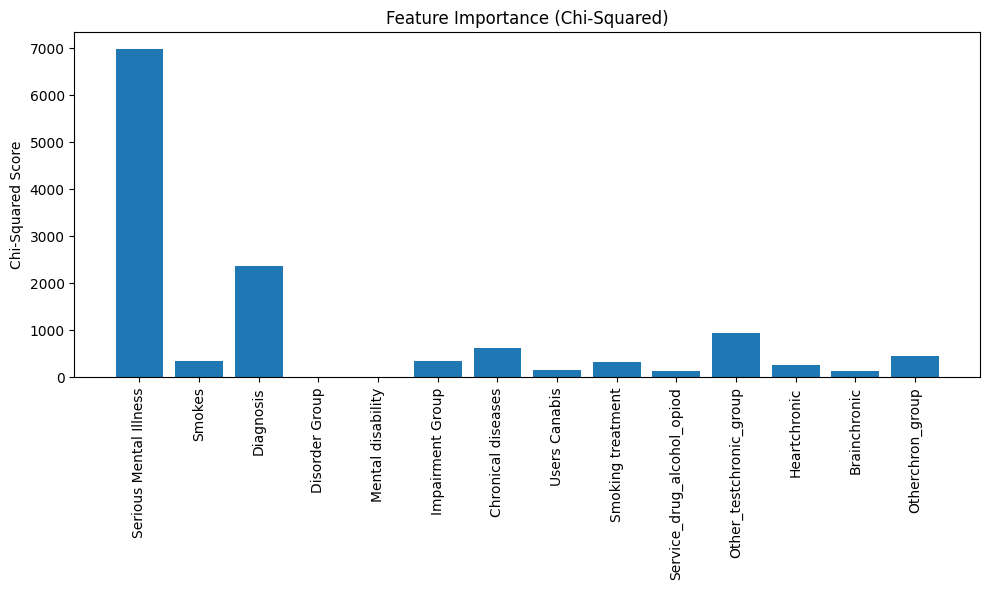

In [37]:
# plot the scores
from matplotlib import pyplot

pyplot.figure(figsize=(10, 6))
pyplot.bar(feature_names, fs.scores_)
pyplot.xticks(rotation=90, ha='center')  # 90-degree rotation
pyplot.ylabel("Chi-Squared Score")
pyplot.title("Feature Importance (Chi-Squared)")
pyplot.tight_layout()
pyplot.show()

#### 📊 Visual Analysis of Feature Importance

We will review the **distribution of the target variable ("Mental Illness")** across selected features to better understand their relationship in a **descriptive way**.

This involves:
- Plotting **stacked bar charts** showing the proportion of each category of a feature (e.g., "Mental disability") for the target values.
- Comparing both **more important** and **less important** features (based on statistical tests like Chi-Squared).
- Visually exploring how strongly different categories **separate or cluster** by the target label.


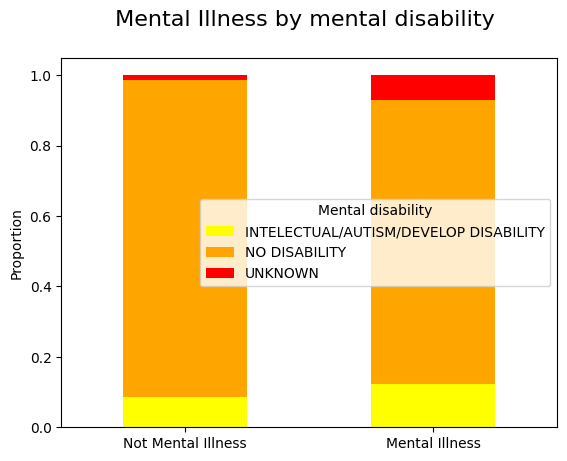

In [38]:
counts_df = Clinical_cat_agg_feat_merg.groupby(["Mental disability", "Mental Illness"])["Mental Illness"].count().unstack()
counts_df
# Divide by the total number and transpose for plotting
pclass_percents_df = counts_df.div(counts_df.sum()).T
pclass_percents_df
fig, ax = plt.subplots()

pclass_percents_df.plot(kind="bar", stacked=True, color=["yellow", "orange", "red", "green"], ax=ax)

ax.legend(title="Mental disability")
ax.set_xticklabels(["Not Mental Illness", "Mental Illness"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle(" Mental Illness by mental disability", fontsize=16);

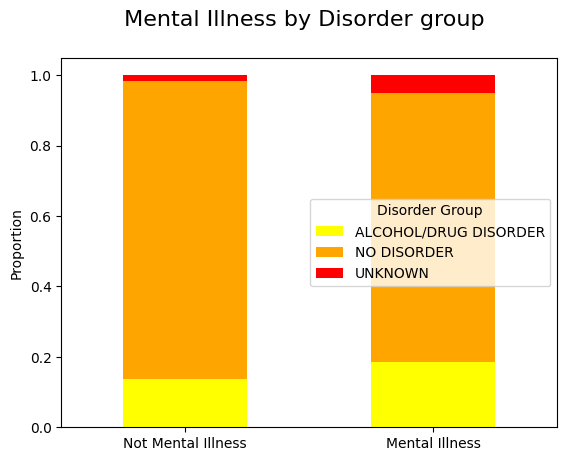

In [39]:
counts_df = Clinical_cat_agg_feat_merg.groupby(["Disorder Group", "Mental Illness"])["Mental Illness"].count().unstack()
counts_df
# Divide by the total number and transpose for plotting
pclass_percents_df = counts_df.div(counts_df.sum()).T
pclass_percents_df
fig, ax = plt.subplots()

pclass_percents_df.plot(kind="bar", stacked=True, color=["yellow", "orange", "red", "green"], ax=ax)

ax.legend(title="Disorder Group")
ax.set_xticklabels(["Not Mental Illness", "Mental Illness"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle(" Mental Illness by Disorder group", fontsize=16);

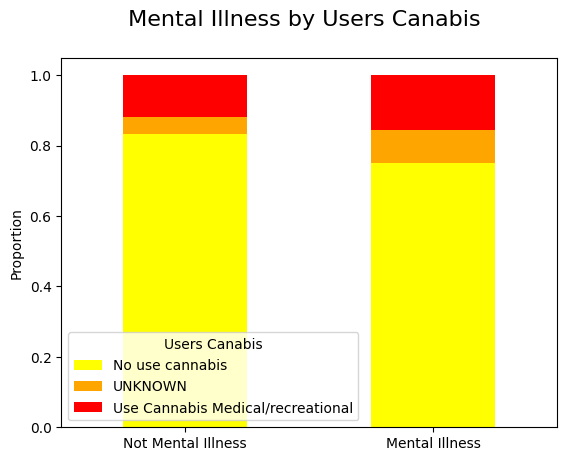

In [40]:
counts_df = Clinical_cat_agg_feat_merg.groupby(["Users Canabis", "Mental Illness"])["Mental Illness"].count().unstack()
counts_df
# Divide by the total number and transpose for plotting
pclass_percents_df = counts_df.div(counts_df.sum()).T
pclass_percents_df
fig, ax = plt.subplots()

pclass_percents_df.plot(kind="bar", stacked=True, color=["yellow", "orange", "red", "green"], ax=ax)

ax.legend(title="Users Canabis")
ax.set_xticklabels(["Not Mental Illness", "Mental Illness"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle(" Mental Illness by Users Canabis", fontsize=16);

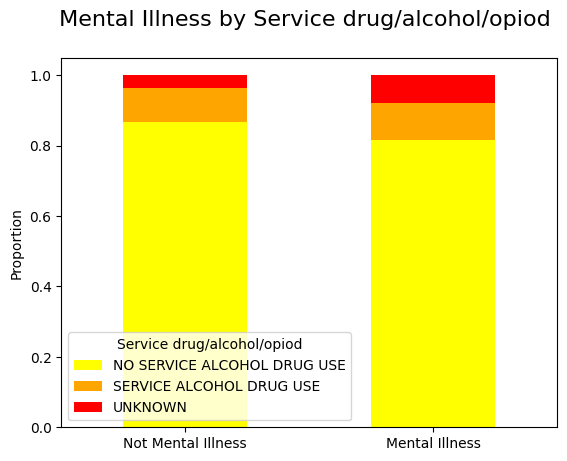

In [41]:
counts_df = Clinical_cat_agg_feat_merg.groupby(["Service_drug_alcohol_opiod", "Mental Illness"])["Mental Illness"].count().unstack()
counts_df
# Divide by the total number and transpose for plotting
pclass_percents_df = counts_df.div(counts_df.sum()).T
pclass_percents_df
fig, ax = plt.subplots()

pclass_percents_df.plot(kind="bar", stacked=True, color=["yellow", "orange", "red", "green"], ax=ax)

ax.legend(title="Service drug/alcohol/opiod")
ax.set_xticklabels(["Not Mental Illness", "Mental Illness"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle(" Mental Illness by Service drug/alcohol/opiod", fontsize=16);

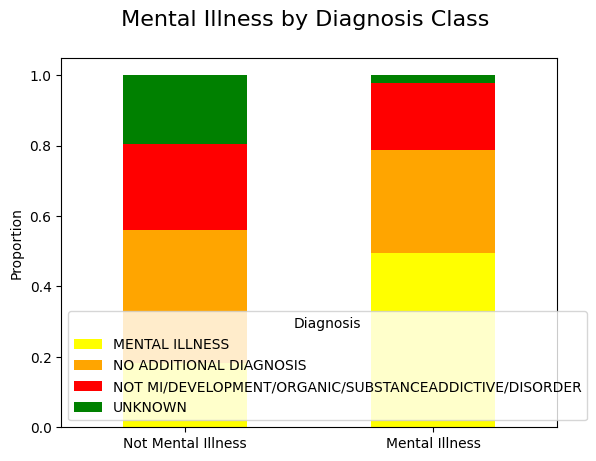

In [42]:
counts_df = Clinical_cat_agg_feat_merg.groupby(["Diagnosis", "Mental Illness"])["Mental Illness"].count().unstack()
counts_df
# Divide by the total number and transpose for plotting
pclass_percents_df = counts_df.div(counts_df.sum()).T
pclass_percents_df

fig, ax = plt.subplots()

pclass_percents_df.plot(kind="bar", stacked=True, color=["yellow", "orange", "red", "green"], ax=ax)

ax.legend(title="Diagnosis")
ax.set_xticklabels(["Not Mental Illness", "Mental Illness"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle(" Mental Illness by Diagnosis Class", fontsize=16);

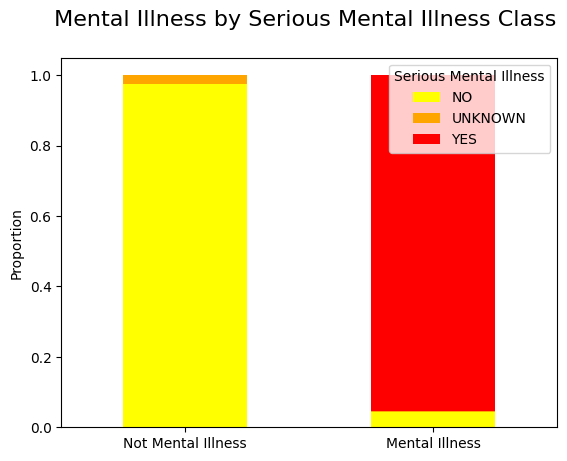

In [43]:
counts_df = Clinical_cat_agg_feat_merg.groupby(["Serious Mental Illness", "Mental Illness"])["Mental Illness"].count().unstack()
counts_df
# Divide by the total number and transpose for plotting
pclass_percents_df = counts_df.div(counts_df.sum()).T
pclass_percents_df

fig, ax = plt.subplots()

pclass_percents_df.plot(kind="bar", stacked=True, color=["yellow", "orange", "red", "green"], ax=ax)

ax.legend(title="Serious Mental Illness")
ax.set_xticklabels(["Not Mental Illness", "Mental Illness"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle(" Mental Illness by Serious Mental Illness Class", fontsize=16);

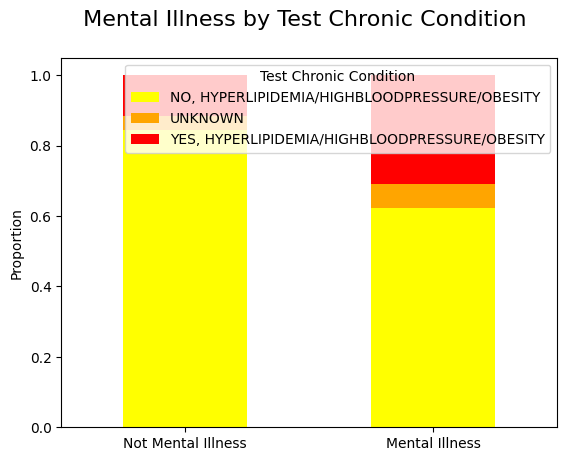

In [44]:
counts_df = Clinical_cat_agg_feat_merg.groupby(["Other_testchronic_group", "Mental Illness"])["Mental Illness"].count().unstack()
counts_df
# Divide by the total number and transpose for plotting
pclass_percents_df = counts_df.div(counts_df.sum()).T
pclass_percents_df
fig, ax = plt.subplots()

pclass_percents_df.plot(kind="bar", stacked=True, color=["yellow", "orange", "red", "green"], ax=ax)

ax.legend(title="Test Chronic Condition", loc='upper right')
ax.set_xticklabels(["Not Mental Illness", "Mental Illness"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle(" Mental Illness by Test Chronic Condition", fontsize=16);

In [45]:
# Based on the different test conducted 14 features are significant for predicting the target
column_to_drop = ['Mental Illness']
C= Clinical_cat_agg_feat_merg.drop(columns=column_to_drop)
C.head()

,Serious Mental Illness,Smokes,Diagnosis,Disorder Group,Mental disability,Impairment Group,Chronical diseases,Users Canabis,Smoking treatment,Service_drug_alcohol_opiod,Other_testchronic_group,Heartchronic,Brainchronic,Otherchron_group
0,YES,NO,MENTAL ILLNESS,NO DISORDER,NO DISABILITY,NO PHYSICAL IMPAIRMENT,NO CHRONICAL MEDICAL CONDITION,No use cannabis,No Received Smoking Medication/counseling,NO SERVICE ALCOHOL DRUG USE,"NO, HYPERLIPIDEMIA/HIGHBLOODPRESSURE/OBESITY","NO, HEART CHRONIC ILLNESS","NO, BRAIN CHRONIC ILLNESS","NO, CHRONIC ILLNESS"
1,YES,NO,MENTAL ILLNESS,NO DISORDER,NO DISABILITY,NO PHYSICAL IMPAIRMENT,NO CHRONICAL MEDICAL CONDITION,No use cannabis,No Received Smoking Medication/counseling,NO SERVICE ALCOHOL DRUG USE,"NO, HYPERLIPIDEMIA/HIGHBLOODPRESSURE/OBESITY","NO, HEART CHRONIC ILLNESS","NO, BRAIN CHRONIC ILLNESS","NO, CHRONIC ILLNESS"
2,YES,YES,NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/...,ALCOHOL/DRUG DISORDER,INTELECTUAL/AUTISM/DEVELOP DISABILITY,NO PHYSICAL IMPAIRMENT,NO CHRONICAL MEDICAL CONDITION,Use Cannabis Medical/recreational,No Received Smoking Medication/counseling,NO SERVICE ALCOHOL DRUG USE,"NO, HYPERLIPIDEMIA/HIGHBLOODPRESSURE/OBESITY","NO, HEART CHRONIC ILLNESS","NO, BRAIN CHRONIC ILLNESS","NO, CHRONIC ILLNESS"
3,YES,YES,NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/...,ALCOHOL/DRUG DISORDER,NO DISABILITY,NO PHYSICAL IMPAIRMENT,NO CHRONICAL MEDICAL CONDITION,No use cannabis,Received Smoking Medication/counseling,SERVICE ALCOHOL DRUG USE,"NO, HYPERLIPIDEMIA/HIGHBLOODPRESSURE/OBESITY","NO, HEART CHRONIC ILLNESS","NO, BRAIN CHRONIC ILLNESS","NO, CHRONIC ILLNESS"
4,YES,YES,MENTAL ILLNESS,ALCOHOL/DRUG DISORDER,NO DISABILITY,NO PHYSICAL IMPAIRMENT,CHRONICAL MEDICAL CONDITION,No use cannabis,Received Smoking Medication/counseling,NO SERVICE ALCOHOL DRUG USE,"YES, HYPERLIPIDEMIA/HIGHBLOODPRESSURE/OBESITY","NO, HEART CHRONIC ILLNESS","NO, BRAIN CHRONIC ILLNESS","NO, CHRONIC ILLNESS"


In [47]:
C.to_csv("Clinical_features_cleaned.csv")